# Outline

* Tools
* Types of data
* Types of plots
* Typical tasks

# Tools

Static / Interactive

Purpose of data visualization tools are

* **Meet** the data by yourself
* **Introduce** the data to others

## Static

* *Matplotlib*
* [Pandas built-in plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
* *Seaborn*

Seaborn and Pandas plotting is based on Matplotlib backend and give you a quick way to explore data. However if you want not only to see the data but to show them to others as well impressively, you need to know essentials of Matplotlib. Plotting in Pandas is the same as in Matplotlib but from within DataFrame directly.

## Interactive

* *Plotly*
* *Bokeh*
* Mpld3
* [Altair](https://github.com/altair-viz/altair)
* Vispy

---
## Types of data (nature of variable)

* Numbers $
\begin{cases}
  {\rm Continuous}\\
  \mathrm{Discrete}
\end{cases}
$
* Labels $
\ \ \ 
\begin{cases}
  \mathrm{Ordinal}\\
  {\rm Categorical\ (nominal)}
\end{cases}
$

---
## Types of plots

### Low dimentional
* Points
  * **Rug** (1d)
  * **Scatter** (2d cloud)
* Line (interpolation)
* Fillbetween
    * Approximation with a confidence
* Bar
  * **Dot** (strip chart) <is described by William S. Cleveland as an alternative to the bar chart, in which dots are used to depict the quantitative values (e.g. counts) associated with categorical variables.>
  * Stack
  * Donut
  * Pie
* Box whiskers
* Histogram
* Heat map
  * Choroplet
* Contour

Only two kinds of them show observations directly: dot chart and scatter plots.

### Multidimentional
* Spaghetti — single free variable, multiple dependent variables: $\bigcup \mathbb{R} \times \mathbb{R}$
* Radar (polary casped case of rug): $\{a, b, ..., n\} \times \mathbb{R}$
* Parallel coordinates (lineary stacked case of rug): $\{a, b, ..., n\} \times \mathbb{R}$

Mathematically a _plot_ is a window cropped out off infinite plane. Graph is all ordered pairs of the variables and (sometime) its interpolations.

---

# Typical Tasks

* Customization (styles): default, prospective vs. retrospective
  * Size
  * Orientation (for categorical data especially)
    * vertical
    * horizontal
  * Color
  * Line
    * width
    * type
  * Font (LaTeX-like)
  * Limits
  * Scale, units
* Highlights + annotations
* Overlay several homogeneous variables on the same plot (spaghetti)
* Sidebar
* parallel axes
  * different scales
  * same scales
  * [parasite axis](https://matplotlib.org/tutorials/toolkits/axisartist.html#axisartist-with-parasiteaxes)
* Zoom inset
* Layout of subplots
* Finetuning
  * Units in pixels
  * Adjust margins

---
# Preliminaries

In [77]:
# Hide all warnings
import warnings
warnings.simplefilter('ignore')

# Data
import pandas as pd
import numpy as np

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots directly within Jupyter Out
%matplotlib inline

In [78]:
# Use Pygments to do syntax highlighting
from pprint import pformat
from pygments import highlight
from pygments.formatters import TerminalFormatter as formatter
from pygments.lexers import PythonLexer as lexer

def pprint(ob):
    output = highlight(pformat(ob), lexer(), formatter())
    print(output)

# A Plot Anatomy

<center>
![Anatomy of a figure](https://matplotlib.org/_images/anatomy1.png)
</center>

* _Data_ are drawn as graph (primitives like points, `lines`, segments)
* _Graph_ is embedded in plot (`axes`)
* _Plot_ is embedded in `figure`

Terms _plot_ and _figure_ are almost interchangeable while you're not plotting multiple subplots on the same `figure`.

Terms _plot_ and _axes_ are totally interchangeable, `axes` is just matplotlib specific term.

A ***graph*** means image of the data, e.g. points, lines, surfaces etc. A ***plot*** = graph + description of its space, e.g. axes (plural axis, not *axes*), limits, scales, units, titles, legend, etc.

# Entrypoint

Let's reproduce example from the lecture and construct toy dataset explicitly

In [79]:
received = [161, 181, 251, 151, 171, 160, 140, 202, 160, 139, 149, 177]
processed = [160, 180, 250, 150, 170, 150, 135, 156, 126, 104, 124, 140]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df = pd.DataFrame({'Received': received,
                   'Processed': processed,
                   '2014': months})
df

Received  Processed 2014
0        161        160  Jan
1        181        180  Feb
2        251        250  Mar
3        151        150  Apr
4        171        170  May
5        160        150  Jun
6        140        135  Jul
7        202        156  Aug
8        160        126  Sep
9        139        104  Oct
10       149        124  Nov
11       177        140  Dec

Matplotlib provides a state-machine
```python
import matplotlib.pyplot as plt
```
corresponding to a plot. The plot is refered to the last *axes* created explicitly by `plt.subplots()` or implicitly during calling plot methods like `plt.plot()`

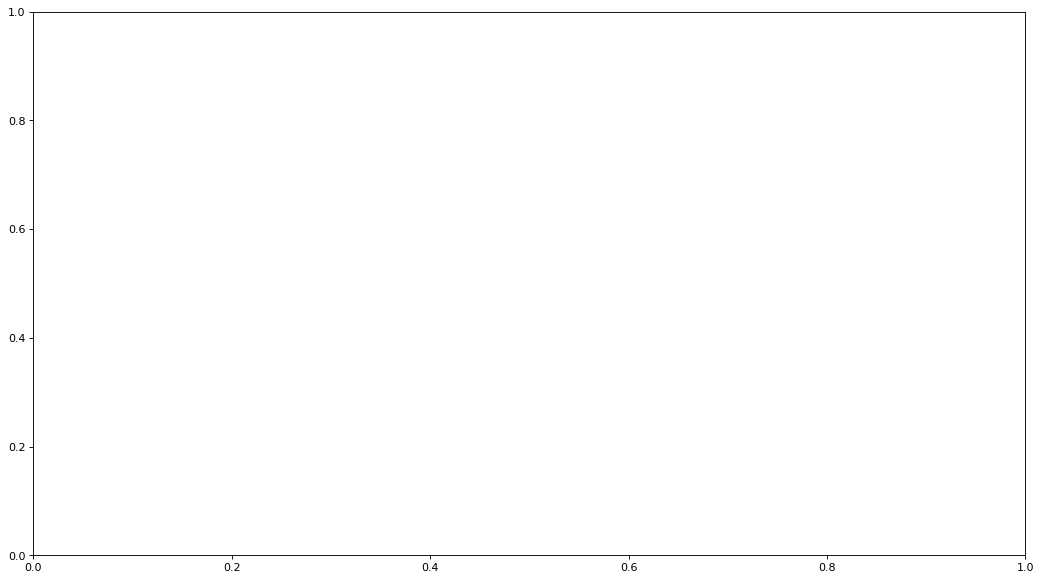

In [80]:
fig, ax = plt.subplots(figsize=(16, 9), dpi=80)

The first call to `plt.plot` will automatically create the necessary anonymous *figure* and *axes* to achieve the desired plot. Subsequent calls to `plt.plot` re-use the current *axes* and each add another graph.

This is the same as you wrote `ax.plot` instead `plt.plot`. In both cases you will get a list of plotted graph primitives.

But since **lifetime of `plt` state-machine is limited by Jupyter-cell scope**, you can't simply re-use global anonymous `figure`-object

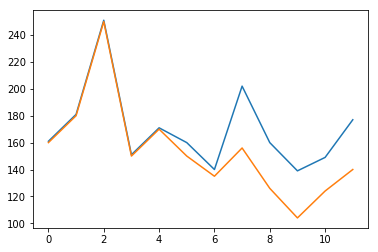

In [81]:
lines = plt.plot(df[['Received', 'Processed']])

The size of figure is resetted to default since it is not the same figure defined in `plt.subplots()` above with `figsize=(16, 9)`, it is new one. And you can **g**et **c**urrent **f**igure via `plt.gcf()` as well as you can **g**et **c**urrent **a**xes via `plt.gca()` methods. These methods can be called after each plotting method of any library based on Matplotlib, and you can be sure you are getting the product of its plotting methods.

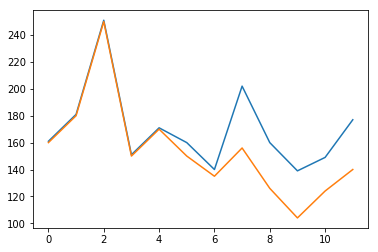

In [82]:
lines = plt.plot(df[['Received', 'Processed']]) # Remember cell scope and recreate the plot
fig, ax = plt.gcf(), plt.gca()

In almost all tutorials you will be suggested to use `plt.show()` to display your plot, but it's not the case of Jupyter cells which render in inline mode. Just type `figure`-object in the cell instead

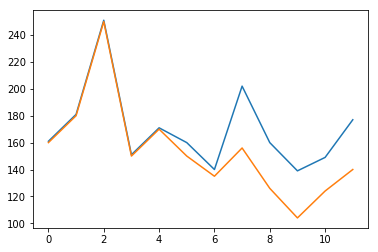

In [83]:
fig

Almost all parameters you are typing in intialization of some object, e.g. `figsize` in `plt.subplots()` you can set afterward by method `set()` of the object, but not always they have the same name

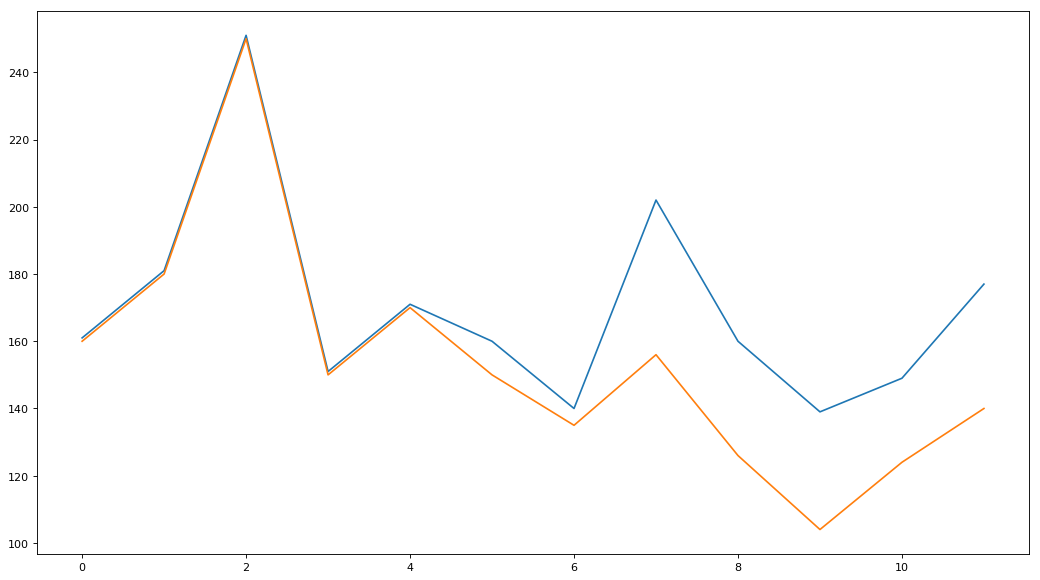

In [84]:
fig.set(size_inches=(16, 9), dpi=80)
fig

## Where are the data?

Okay, `plt.plot()` returns a list of plotted graphs (some primitives):

In [85]:
pprint(lines)

So, where are my data?

Carrier of the data is a graph, e.g. line primitive:

In [86]:
pprint(lines[0].get_data())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([161, 181, 251, 151, 171, 160, 140, 202, 160, 139, 149, 177]))



Each object has at least children or parent object

In [87]:
pprint({'Parent of line': lines[0].axes})

{'Parent of line': <matplotlib.axes._subplots.AxesSubplot object at 0x1a1a0d4400>}



Parent of lines is the same axes we've already plotted our data on:

In [88]:
pprint([lines[0].axes is ax,
        lines[1].axes is ax])

[True, True]



Children of `axes` are just a list of plot and graph elements: lines, spines, axis X&Y, its labels, and title of plot

In [89]:
pprint({'Children of axes': ax.get_children()})

{'Children of axes': [<matplotlib.lines.Line2D object at 0x1a19bdbf98>,
                      Text(0.5,1,''),
                      Text(0,1,''),
                      Text(1,1,''),
                      <matplotlib.patches.Rectangle object at 0x1a19be7780>]}



Plotted lines can be listed from `axes` directly

In [90]:
pprint(ax.lines)

Let's beautify our lines

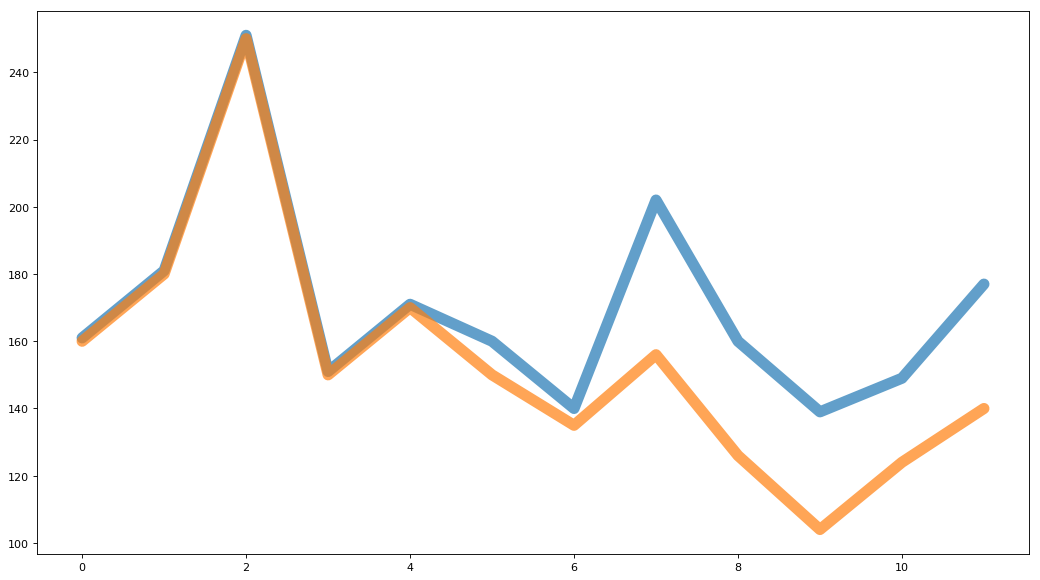

In [91]:
for line in lines:
    line.set(linewidth=10, solid_capstyle='round', alpha=0.7)
fig

What's wrong else with this plot?

# Fonts

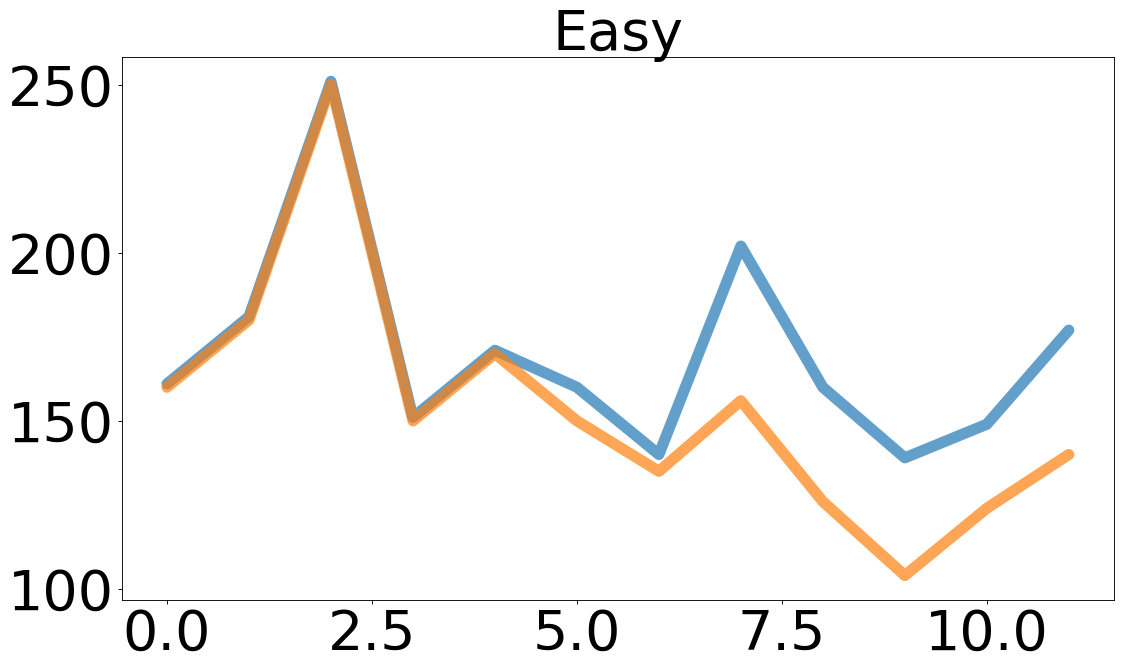

In [92]:
ax.tick_params(axis='both', which='major', labelsize=50)
ax.set_title('Easy', size=50)
fig

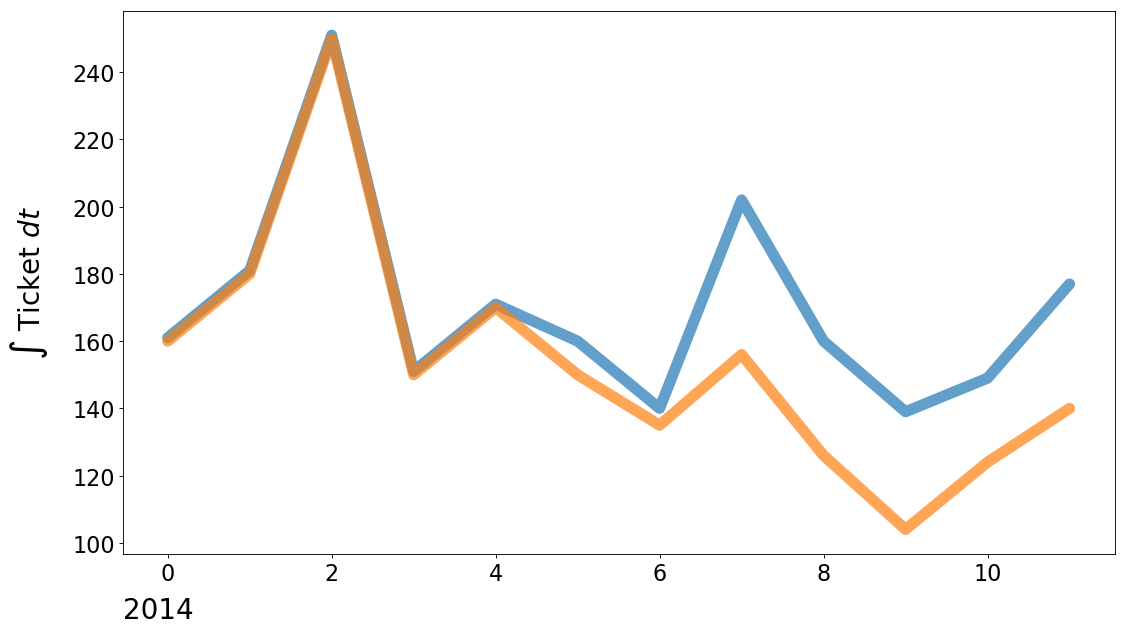

In [93]:
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_title('', size=20)
ax.set_xlabel('2014', size=25, labelpad=10, horizontalalignment='left', position=(0, 0))
ax.set_ylabel(r'$\int\ {\rm Ticket}\ dt$', size=25, labelpad=20)
fig

## Ticks

* Ticks are sparsed automatically
* Boundary values are hidden
* **By default X axis values are $[0, N-1]$**

In [94]:
pprint({'Ticks values': ax.get_xticks()})
pprint({'Ticks limits': ax.get_xlim()})

{'Ticks values': array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.])}

{'Ticks limits': (-0.55, 11.55)}



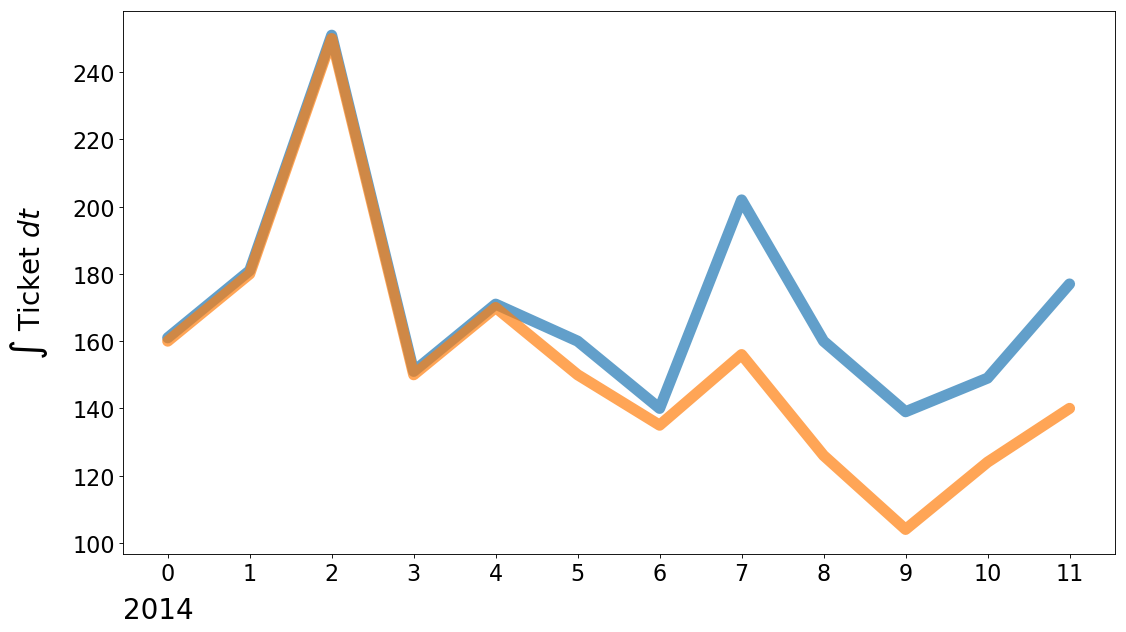

In [95]:
xticks_values = lines[0].get_data()[0]
ax.set_xticks(xticks_values)
fig

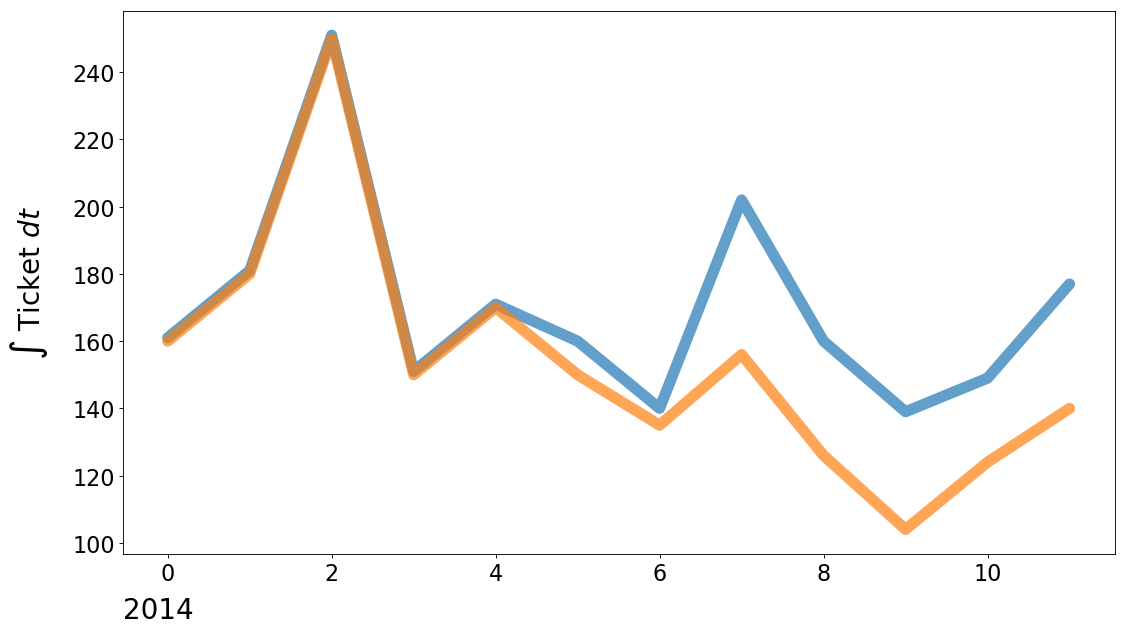

In [96]:
xticks_values = lines[0].get_data()[0][::2]
ax.set(xticks=xticks_values)
fig

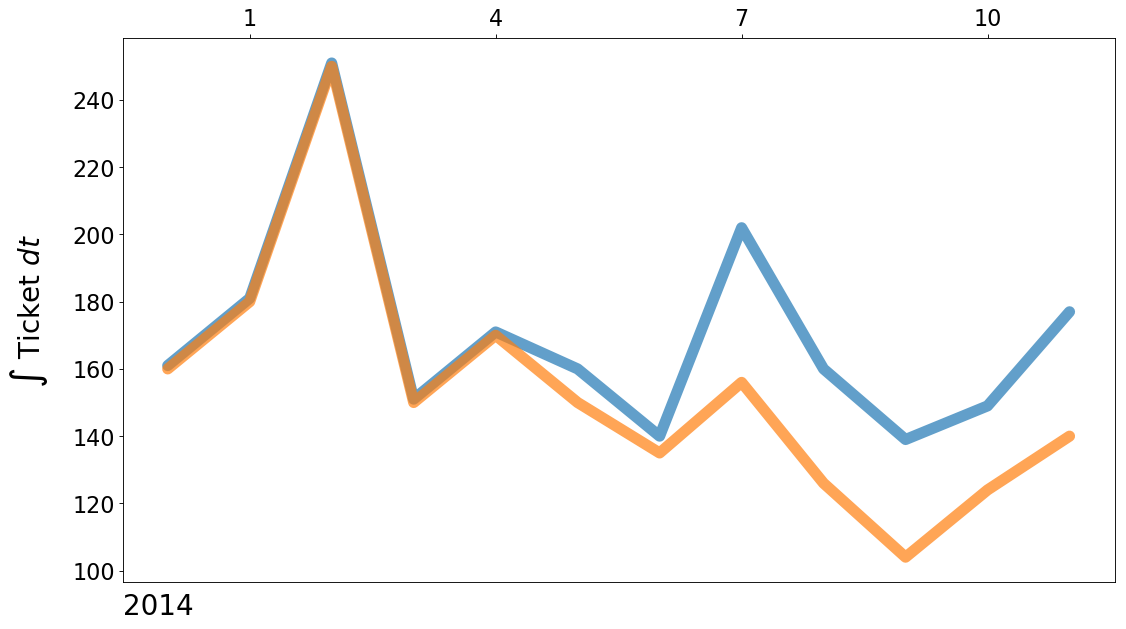

In [97]:
xticks_values = lines[0].get_data()[0][1::3]
ax.get_xaxis().tick_top()
ax.set_xticks(xticks_values)
fig

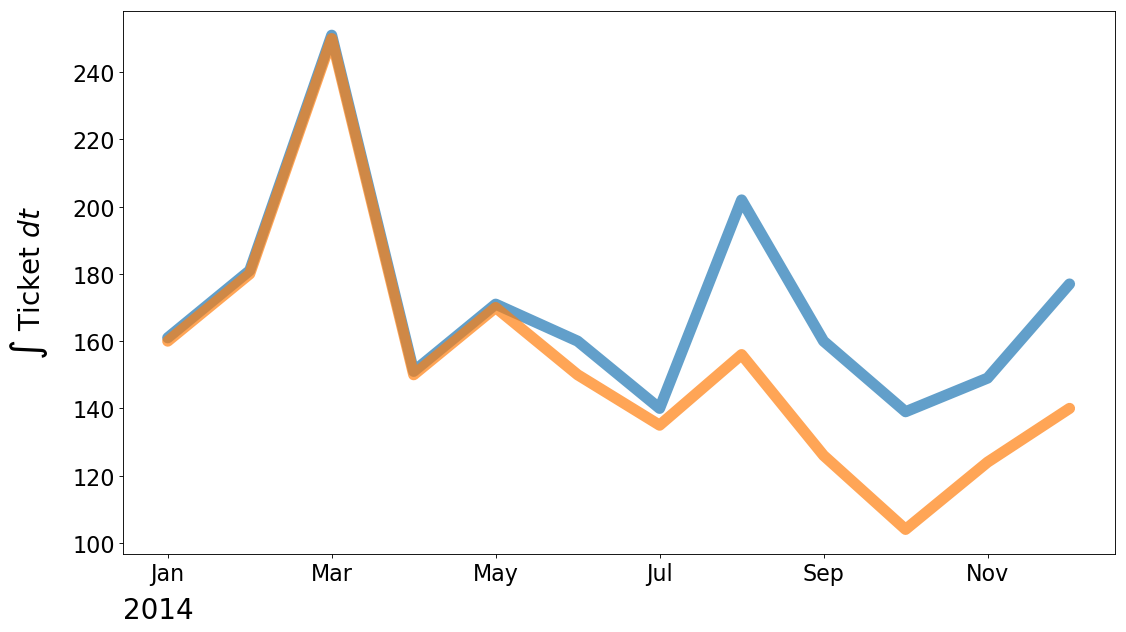

In [98]:
xticks_values = lines[0].get_data()[0][::2]
ax.get_xaxis().tick_bottom()
ax.set_xticks(xticks_values)
ax.get_xaxis().set_ticklabels(df['2014'][::2])
fig

## Spines

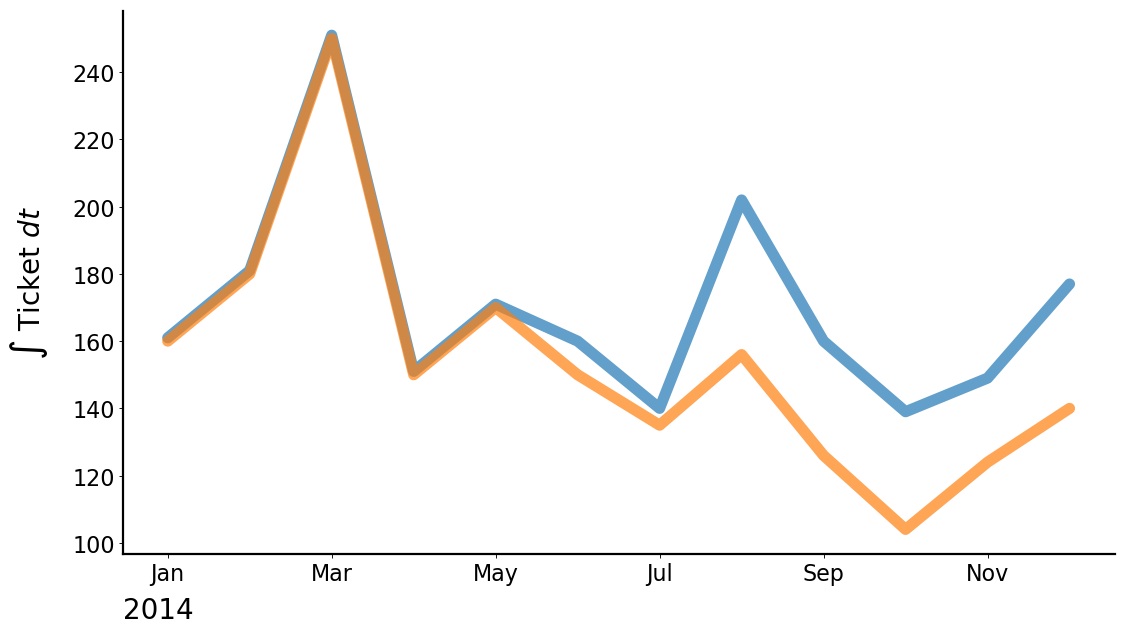

In [99]:
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
fig

## Scale

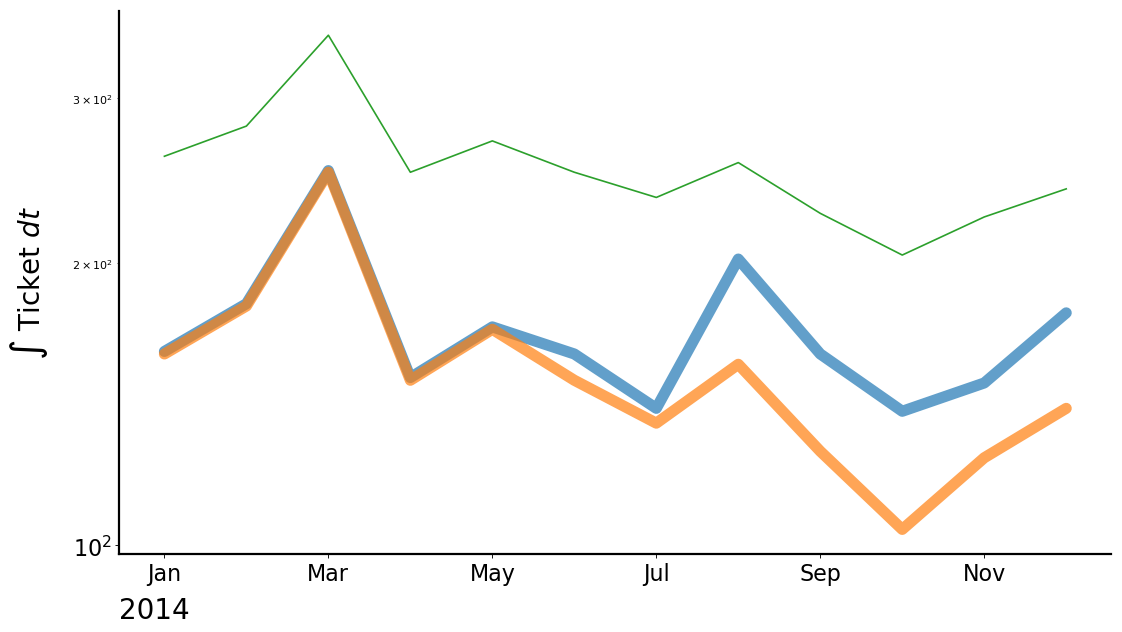

In [100]:
lines += ax.plot(df['Processed'] + 100)
ax.set_yscale('log')
fig

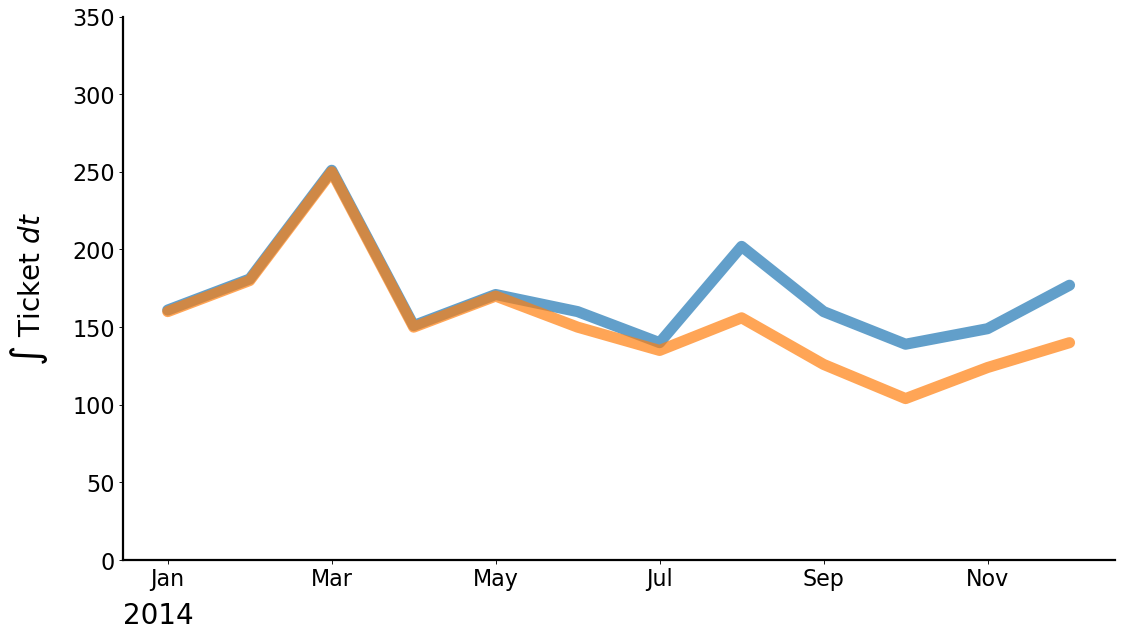

In [101]:
ax.lines = lines[:2]
ax.set_yscale('linear')
ax.set_ylim((0, 350))
fig

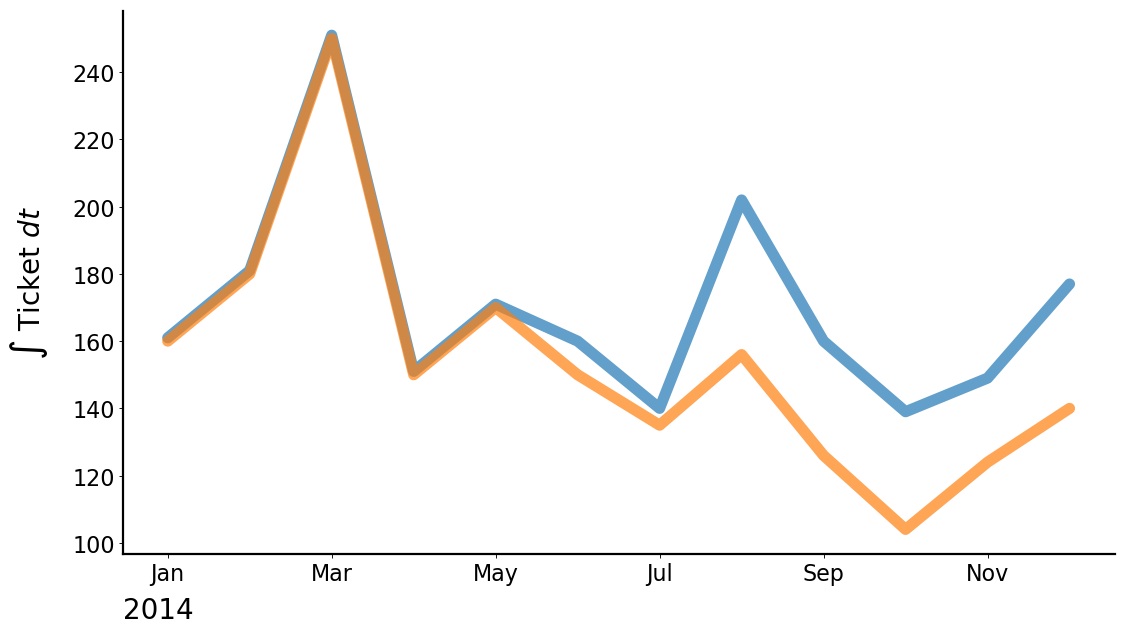

In [102]:
# recompute the ax.dataLim
ax.relim()
ax.set_autoscale_on(True)
# update ax.viewLim using the new dataLim
ax.autoscale_view()
fig

## Annotation

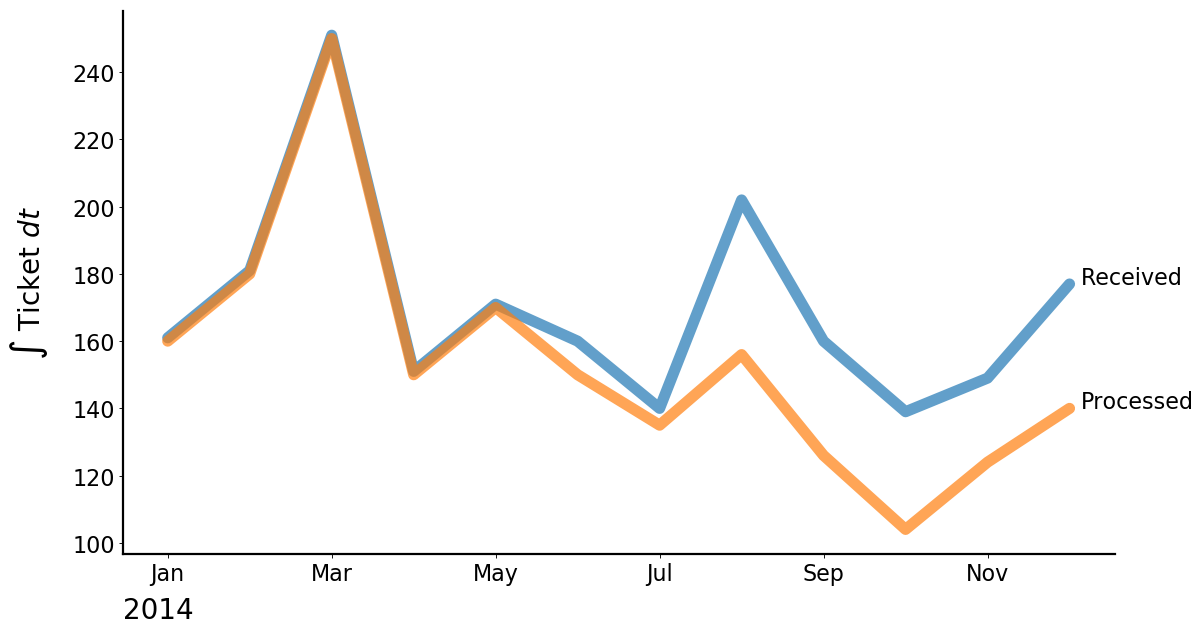

In [103]:
# ax.set_labels('ewr')
# ax.legend()
# for line in lines:
#     line.set_label('test')
for col in df.columns[:2]:
    ax.annotate(col, xy=(df.index[-1], df[col].iloc[-1]),
                xytext=(10,0), textcoords="offset points", size=20)
fig

## [Color](https://matplotlib.org/users/colors.html)

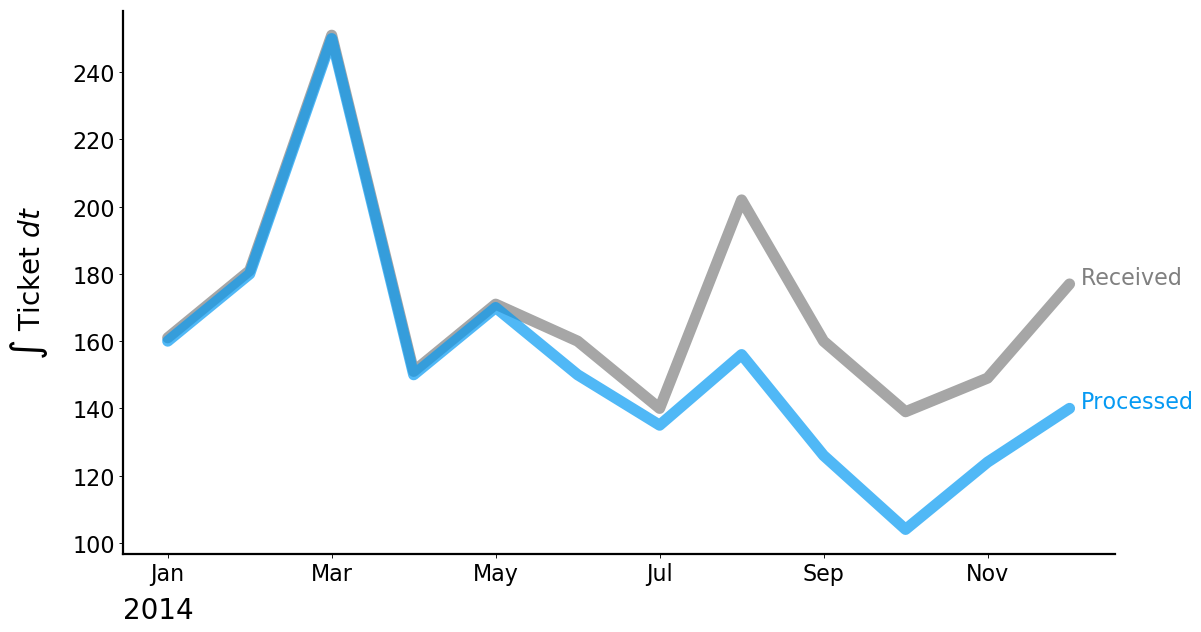

In [104]:
ax.lines[0].set_color('gray')
ax.lines[1].set_color('xkcd:azure')
ax.texts[-2].set_color(ax.lines[0].get_color())
ax.texts[-1].set_color(ax.lines[1].get_color())
fig

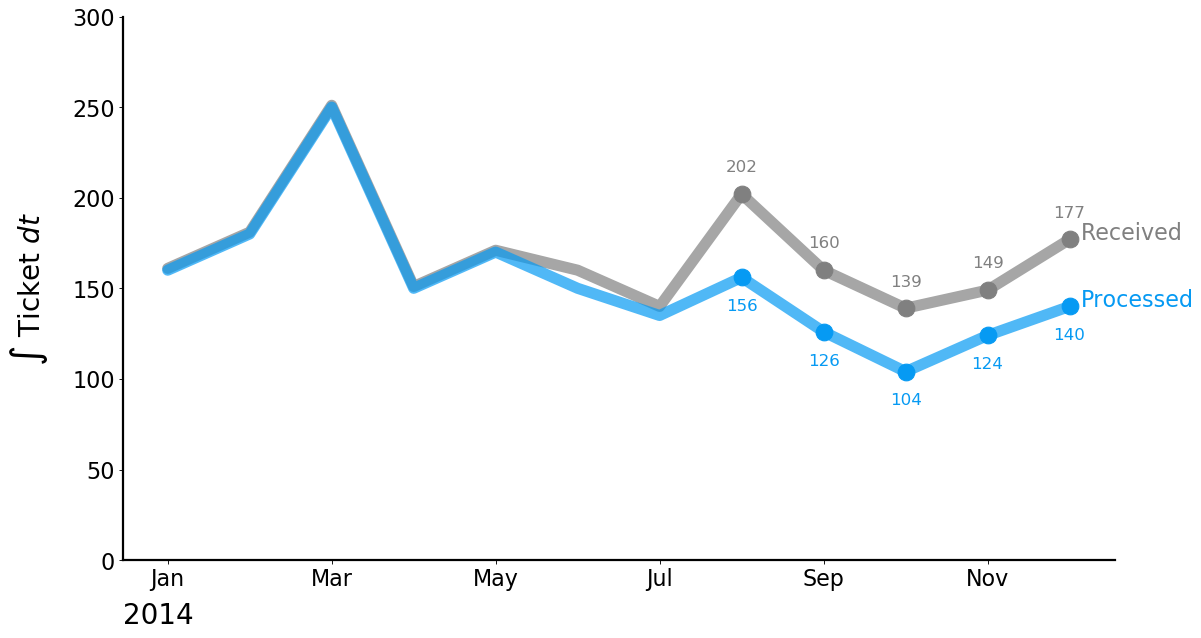

In [105]:
# ax.texts = []
for i, row in df.iloc[7:].iterrows():
    ax.plot(i, row[0], 'o', color='gray', markersize=15)
    ax.plot(i, row[1], 'o', color='xkcd:azure', markersize=15)
    ax.annotate(row[0], xy=(i, row[0]), xytext=(0,20), textcoords="offset points", horizontalalignment='center', color='gray', size=15)
    ax.annotate(row[1], xy=(i, row[1]), xytext=(0,-30), textcoords="offset points", horizontalalignment='center', color='xkcd:azure', size=15)
ax.set_ylim((0, 300))
fig

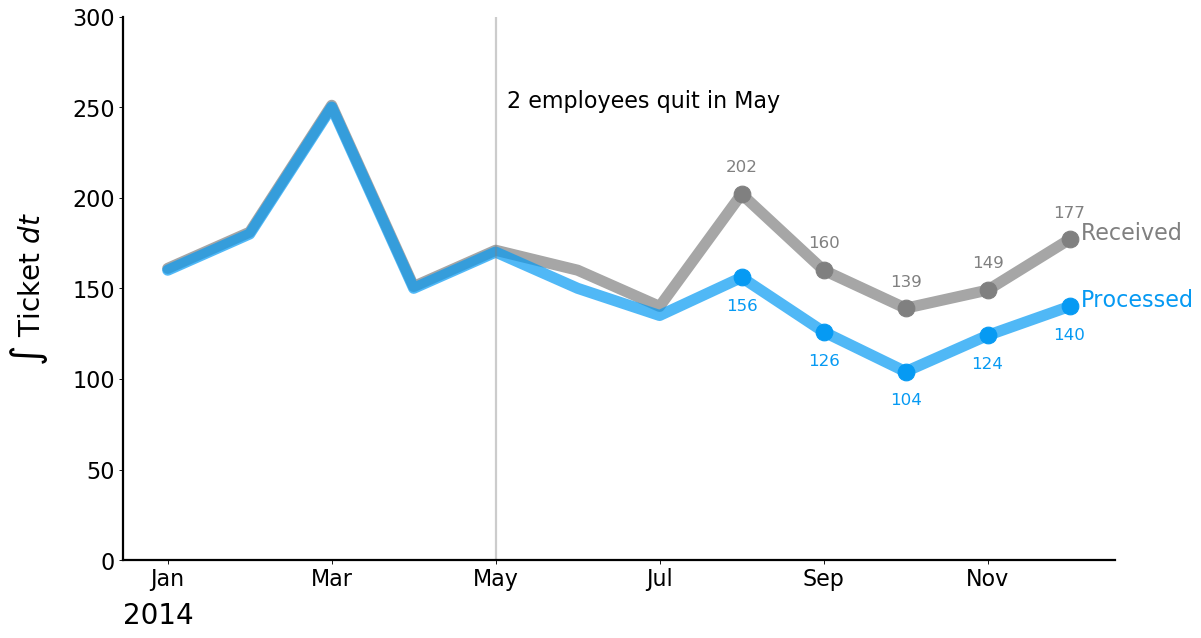

In [106]:
ax.axvline(x=4, ymin=0., ymax=250., linewidth=2, color='gray', alpha=0.4, label='test')
ax.annotate('2 employees quit in May', xy=(4, 250), xytext=(10,0), textcoords="offset points", horizontalalignment='left', size=20)
fig

## Fillbetween diagram

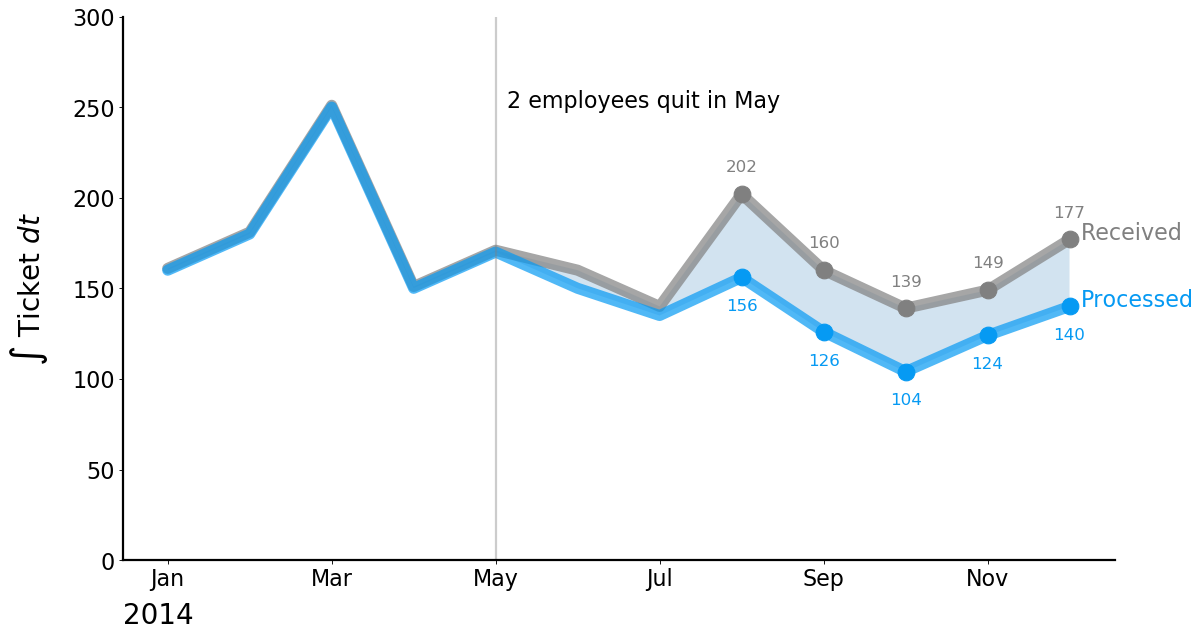

In [107]:
ax.fill_between(df.index, df['Processed'], df['Received'], alpha=0.2)
fig

---

# Seaborn beginning

In [108]:
# !pip uninstall -y seaborn
# !pip install "seaborn>=0.9.0"
# !pip freeze | grep seaborn

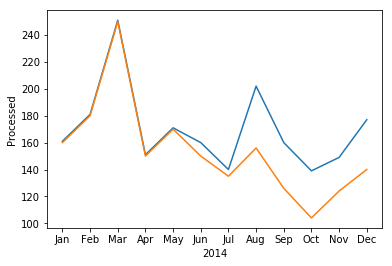

In [111]:
from importlib import reload
reload(sns)
sns.lineplot(data=df, x='2014', y='Received', sort=False)
sns.lineplot(data=df, x='2014', y='Processed', sort=False);

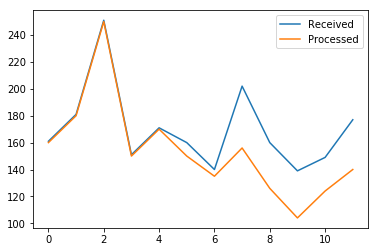

In [112]:
from importlib import reload
reload(sns)
ax = sns.lineplot(data=df[['Received', 'Processed']], dashes=False)

# Load example data

Example data are Titanic dataset from Kaggle.

In [113]:
# https://www.kaggle.com/c/titanic/download/train.csv
df = pd.read_csv('data/train.csv')

In [114]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Matplotlib vs. Seaborn

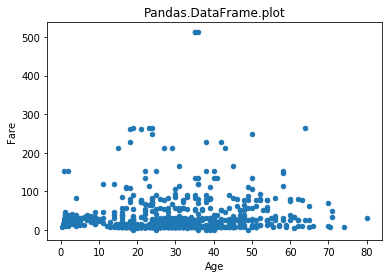

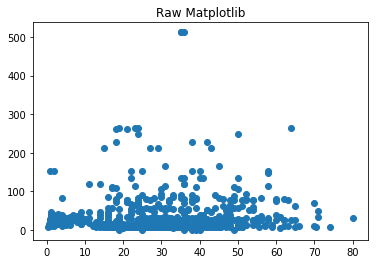

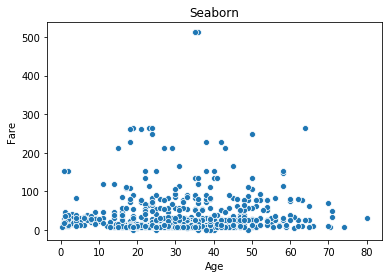

In [116]:
ax = df[['Age', 'Fare']].plot(kind='scatter', x='Age', y='Fare')
ax.set_title('Pandas.DataFrame.plot')
_, ax = plt.subplots()
a = plt.scatter(x=df['Age'], y=df['Fare'])
a.axes.set_title('Raw Matplotlib')
_, ax = plt.subplots()
ax.set_title('Seaborn')
sns.scatterplot(x='Age', y='Fare', data=df, ax=ax);

Two points on the top are very outliers.

In [117]:
print(df['Sex'][:10])
print(df['Sex'].factorize()[0][:10])

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
Name: Sex, dtype: object
[0 1 1 1 0 0 0 0 1 1]


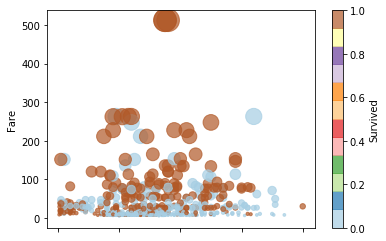

In [118]:
df.plot(kind='scatter', x='Age', y='Fare', c='Survived', s=df['Fare'], alpha=0.7, cmap='Paired')

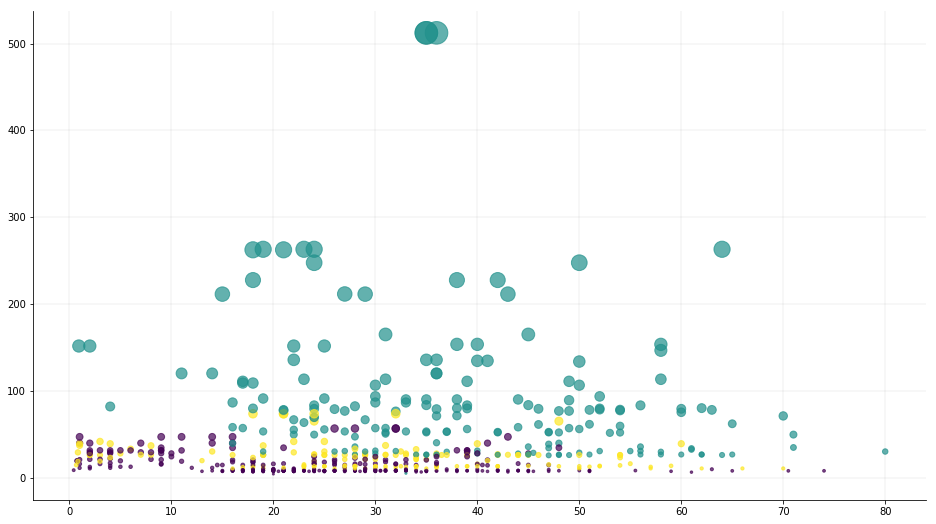

In [119]:
a = plt.scatter(x=df['Age'], y=df['Fare'], c=df['Pclass'].factorize()[0], s=df['Fare'], alpha=0.7, cmap='viridis')
a.axes.spines['top'].set_visible(False)
a.axes.spines['right'].set_visible(False)
a.axes.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
a.figure.set_size_inches(16, 9)

## Joint plot

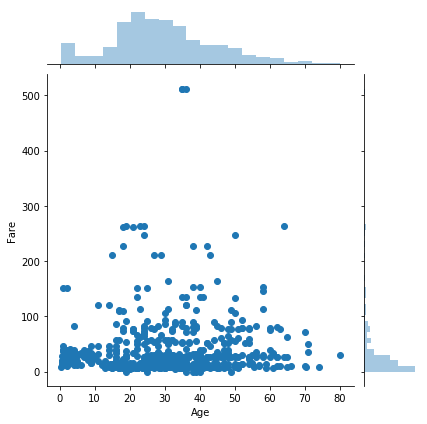

In [120]:
jnt = sns.jointplot(data=df, x='Age', y='Fare')

(-5, 100)

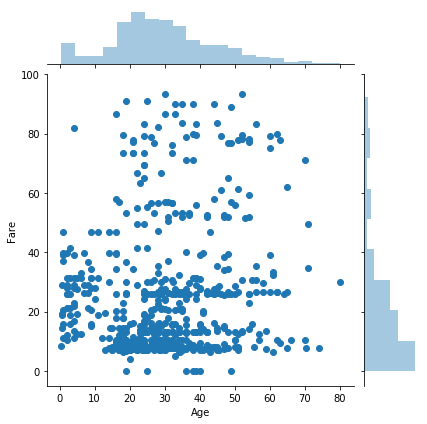

In [121]:
jnt = sns.jointplot(data=df, x='Age', y='Fare')
plt.ylim(-5, 100)

> Several of the seaborn commands create their own figure automatically. This is hardcoded into the seaborn code, so there is currently no way to produce such plots in existing figures. Those are `PairGrid`, `FacetGrid`, `JointGrid`, `pairplot`, `jointplot` and `lmplot`.

[](https://stackoverflow.com/a/47664533)

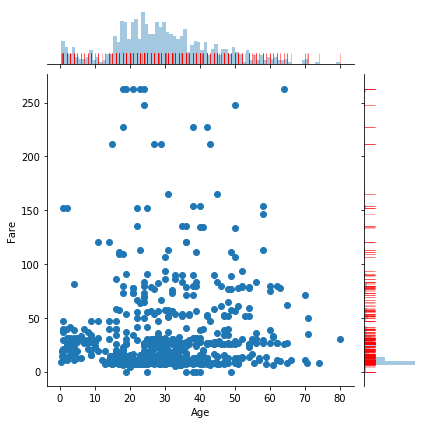

In [122]:
# https://python-graph-gallery.com/21-control-rug-and-density-on-seaborn-histogram/

jnt = sns.jointplot(data=df[df['Fare'] < 300], x='Age', y='Fare',
                    marginal_kws=dict(bins=80, rug=True, rug_kws={"color": "r", "alpha":0.3, "linewidth": 1, "height":0.2}))

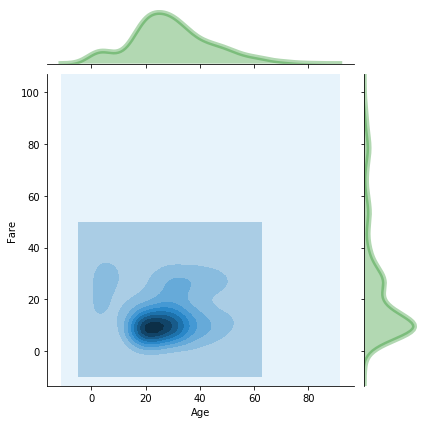

In [123]:
jnt = sns.jointplot(data=df[df['Fare'] < 100], x='Age', y='Fare', kind='kde',
    marginal_kws=dict({"color": "g", "alpha":0.3, "linewidth": 5, "shade":True }))

jnt.ax_joint.axhspan(-10, 50, xmin=0.1, xmax=0.7, alpha=0.3);

# Boxplot

<center>
![](https://matplotlib.org/_images/boxplot_explanation.png)
</center>

## Representation of four distributions with _bar charts_ and _box plots_

>![**Bar charts and box plots** Marc Streit & Nils Gehlenborg *Nature Methods* volume **11**, page 117 (2014)](https://media.nature.com/lw926/nature-assets/nmeth/journal/v11/n2/images/nmeth.2807-F2.jpg)
* (**a**) Bar chart showing sample means ($n = 1000$) with standard-deviation error bars.
* (**b**) Box plot ($n = 1000$) with whiskers extending to ±1.5 × IQR.
* (**c**) Probability density functions of the distributions in **a** and **b**.

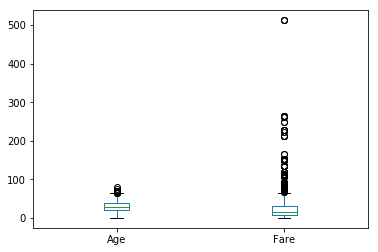

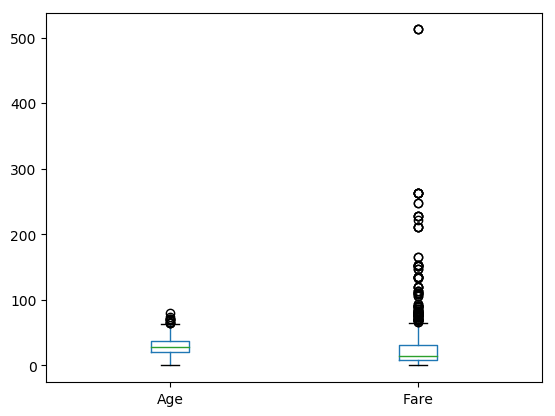

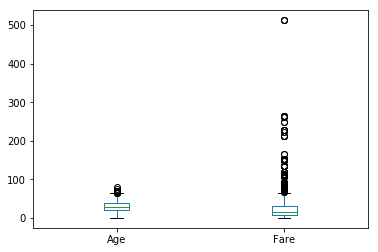

In [124]:
df = pd.read_csv('data/train.csv')

ax = df[['Age', 'Fare']].plot(kind='box')
with plt.style.context('default'):
    ax = df[['Age', 'Fare']].plot(kind='box')
ax = df[['Age', 'Fare']].plot(kind='box')

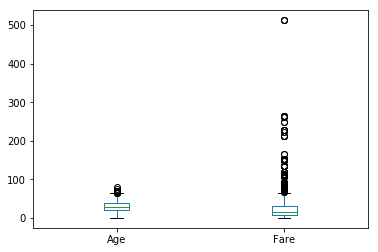

In [125]:
ax = df[['Age', 'Fare']].plot(kind='box')
ax

Age        AxesSubplot(0.125,0.125;0.352273x0.755)
Fare    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

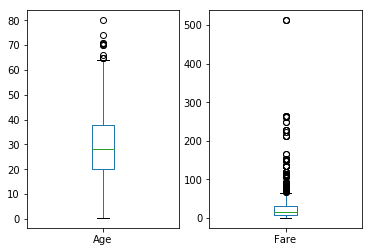

In [126]:
ax = df[['Age', 'Fare']].plot(kind='box', subplots=True)
ax

Age        AxesSubplot(0.125,0.125;0.352273x0.755)
Fare    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

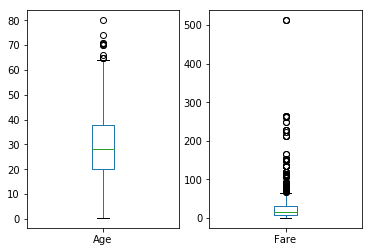

In [127]:
ax = df[['Age', 'Fare']].plot(kind='box', subplots=True)
ax

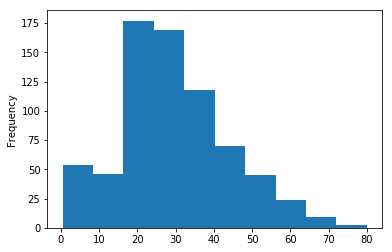

In [128]:
df['Age'].plot(kind='hist')

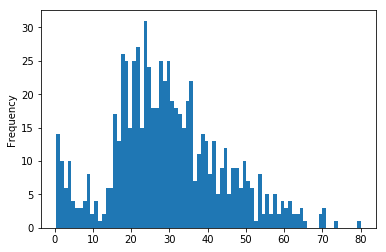

In [129]:
df['Age'].plot(kind='hist', bins=80)

## Auto layout

> [`tight_layout`](https://matplotlib.org/users/tight_layout_guide.html) automatically adjusts subplot params so that the subplot(s) fits in to the figure area. This is an experimental feature and may not work for some cases.

[]()

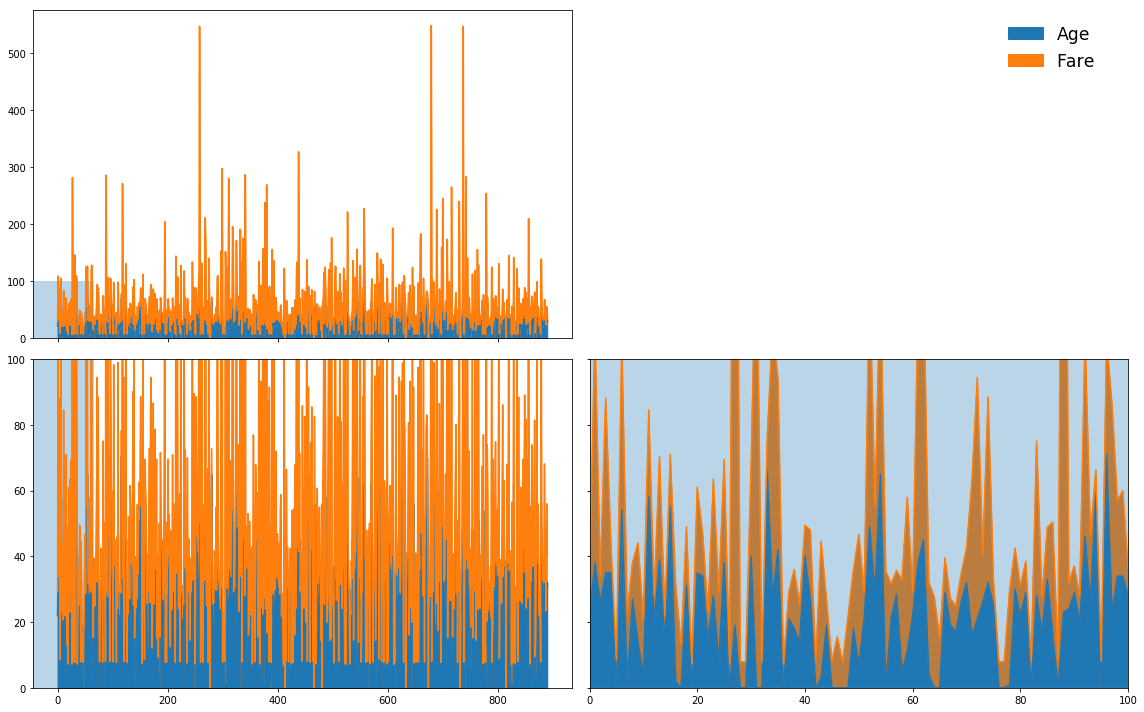

In [130]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
a = df[['Age', 'Fare']].plot(kind='area', ax=ax[0, 0])
b = df[['Age', 'Fare']].plot(kind='area', ax=ax[1, 0], ylim=(0, 100), legend=False, sharex=ax[0, 0])
c = df[['Age', 'Fare']].plot(kind='area', ax=ax[1, 1], xlim=(0, 100), ylim=(0, 100), legend=False, sharey=ax[1, 0])
ax[0,1].axis('off')

plt.tight_layout()
a.legend(bbox_to_anchor=(2.,1.), loc='upper right', fontsize='xx-large', frameon=False)#, borderaxespad=0.)

a.axhspan(0, 100, xmin=0., xmax=100/df.index[-1], alpha=0.3)
b.axhspan(0, 100, xmin=0., xmax=100/df.index[-1], alpha=0.3)
c.axhspan(0, 100, xmin=0., xmax=1., alpha=0.3)

from matplotlib.transforms import Bbox
# ax[0, 1].set_position(Bbox(np.array(ax[0, 1].get_position())-0.2))

False


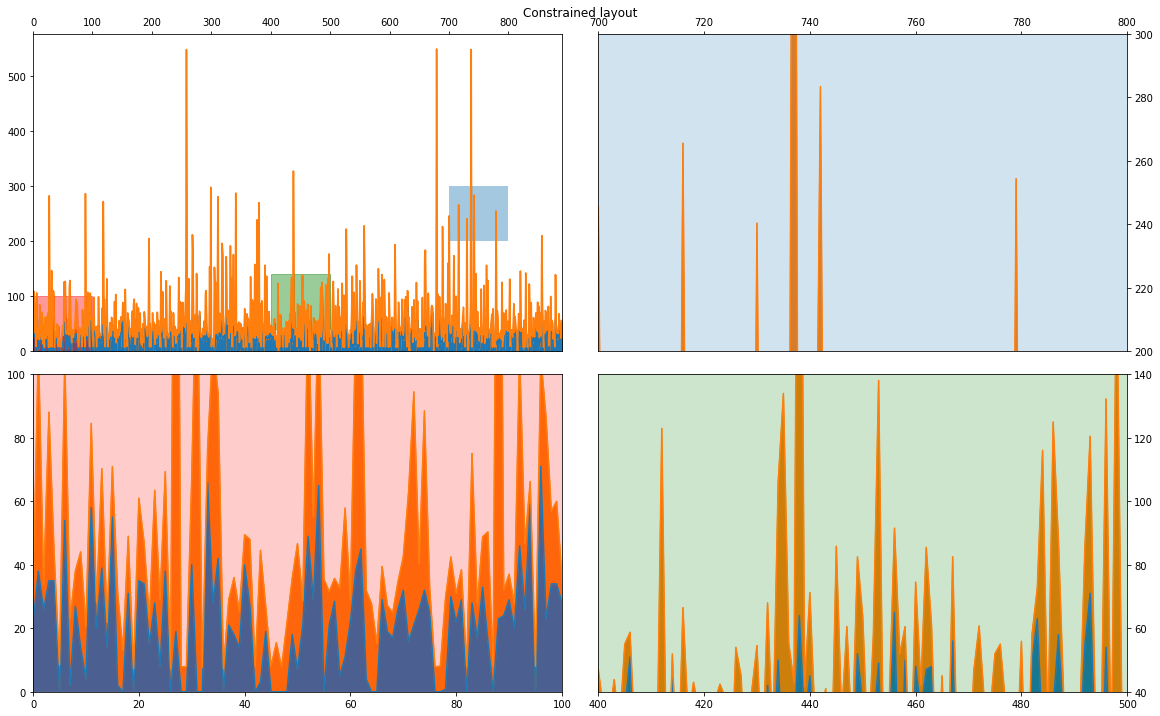

In [131]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10), constrained_layout=True)
# fig.set_constrained_layout(False)
# plt.rcParams['figure.constrained_layout.use'] = True
print(plt.rcParams['figure.constrained_layout.use'])


a = df[['Age', 'Fare']].plot(kind='area', ax=ax[0, 0], xlim=(0, df.index[-1]), legend=False)
b = df[['Age', 'Fare']].plot(kind='area', ax=ax[1, 0], xlim=(0, 100), ylim=(0, 100), legend=False)
c = df[['Age', 'Fare']].plot(kind='area', ax=ax[1, 1], xlim=(400, 500), ylim=(40, 140), legend=False)
d = df[['Age', 'Fare']].plot(kind='area', ax=ax[0, 1], xlim=(700, 800), ylim=(200, 300), legend=False)

a.xaxis.tick_top()
c.yaxis.tick_right()
d.xaxis.tick_top()
d.yaxis.tick_right()

fig.suptitle('Constrained layout')

a.axhspan(0, 100, xmin=0/df.index[-1], xmax=100/df.index[-1], alpha=0.4, color='r')
a.axhspan(40, 140, xmin=400/df.index[-1], xmax=500/df.index[-1], alpha=0.4, color='g')
a.axhspan(200, 300, xmin=700/df.index[-1], xmax=800/df.index[-1], alpha=0.4)

b.axhspan(0, 100, xmin=0., xmax=1., alpha=0.2, color='r')
c.axhspan(40, 140, xmin=0., xmax=1., alpha=0.2, color='g')
d.axhspan(200, 300, xmin=0., xmax=1., alpha=0.2)

# Fillbetween (confidense interval)

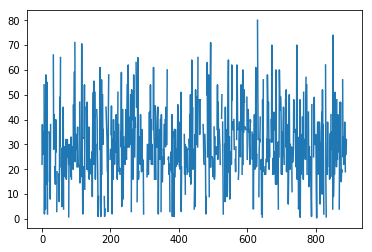

In [132]:
ax = plt.plot(df.index, df['Age'])

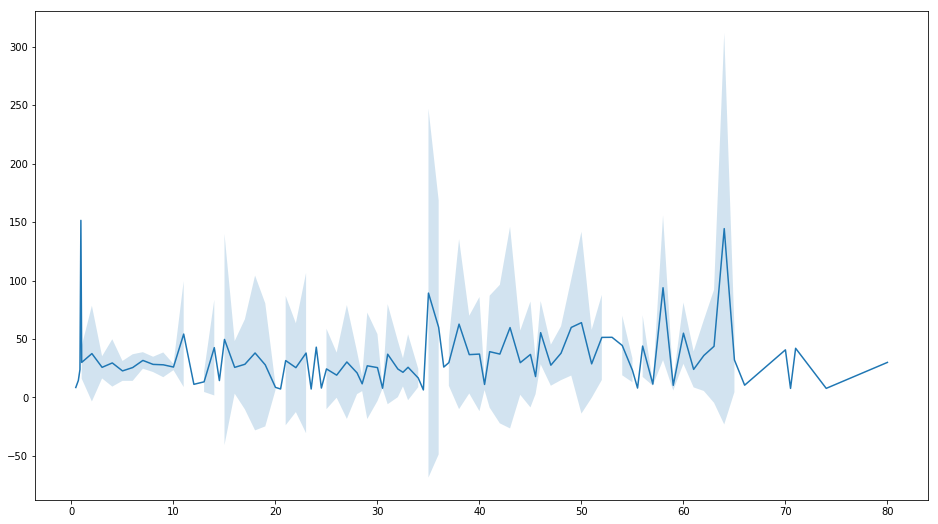

In [133]:
gr = df.loc[:, ['Sex', 'Fare', 'Age']].groupby('Age')
avgs = gr.mean()
x = avgs.index
y1 = avgs.Fare
ax = plt.plot(x, y1)
ax[0].figure.set_size_inches(16, 9)
type(ax[0])
stds = gr.std().Fare #.as_matrix()
ax[0].axes.fill_between(x, y1 - stds, y1 + stds, alpha=0.2);

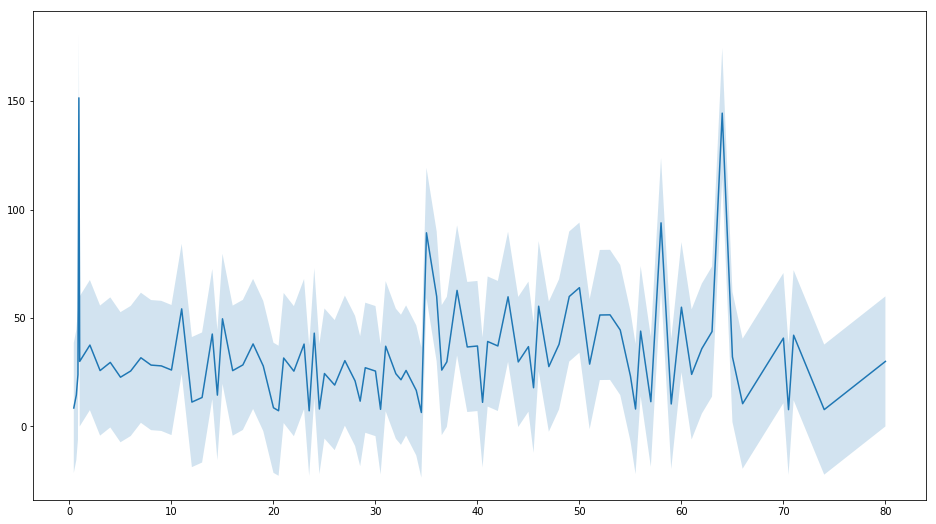

In [134]:
gr = df.loc[:, ['Sex', 'Fare', 'Age']].groupby('Age')
avgs = gr.mean()
x = avgs.index
y1 = avgs.Fare
ax = plt.plot(x, y1)
ax[0].figure.set_size_inches(16, 9)
type(ax[0])
stds = gr.std().Fare#.as_matrix()
ax[0].axes.fill_between(x, y1 - 30, y1 + 30, alpha=0.2);

---
# Multiple Axes

Lets deviate from default `plt.subplots()` and create 1 row of 2 subplots on the same figure arranged horizontally.

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

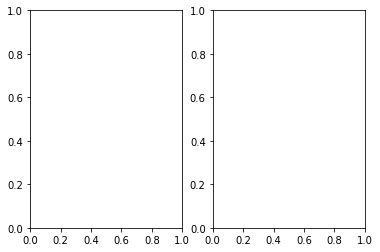

In [135]:
fig, ax = plt.subplots(1, 2)
df['Age'].plot(kind='box', ax=ax)
df['Fare'].plot(kind='box', ax=ax)

Check what's wrong:

In [136]:
type(ax)

numpy.ndarray

In [137]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a198e3ac8>,
      dtype=object)

We've passed `ndarray` instead of `AxesSubplot`.

In [138]:
type(ax[0])

matplotlib.axes._subplots.AxesSubplot

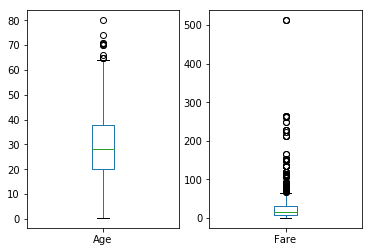

In [139]:
fig, ax = plt.subplots(1, 2)
df['Age'].plot(kind='box', ax=ax[0])
df['Fare'].plot(kind='box', ax=ax[1])

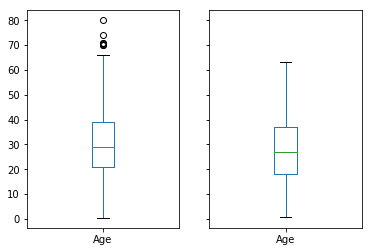

In [140]:
fig, ax = plt.subplots(1, 2, sharey=True)
df[df['Sex'] == 'male']['Age'].plot(kind='box', ax=ax[0])
df[df['Sex'] == 'female']['Age'].plot(kind='box', ax=ax[1])

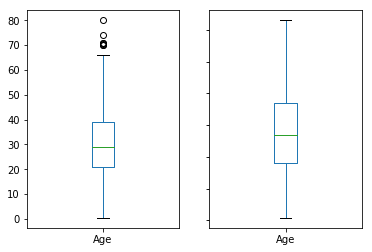

In [141]:
fig, ax = plt.subplots(1, 2, sharey=False)
df[df['Sex'] == 'male']['Age'].plot(kind='box', ax=ax[0], sharey=ax[1])
df[df['Sex'] == 'female']['Age'].plot(kind='box', ax=ax[1], sharey=ax[0])

## Pattern for plotting multiple subplots

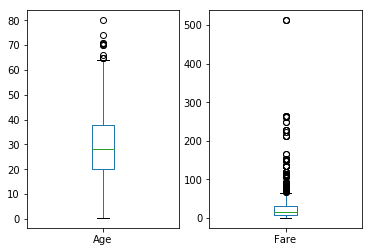

In [142]:
fig, ax = plt.subplots(1, 2)
for i, column in enumerate(['Age', 'Fare']):
    df[column].plot(kind='box', ax=ax[i])

## Share axis from one subplot with other axis from another subplot. Anti-pattern

You may want share several axes, e.g. Y-axis. It is not good idea when your data have different scales or units.

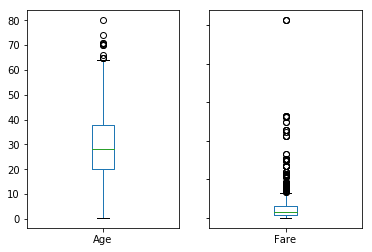

In [143]:
fig, ax = plt.subplots(1, 2)
for i, column in enumerate(['Age', 'Fare']):
    df[column].plot(kind='box', ax=ax[i], sharey=True)

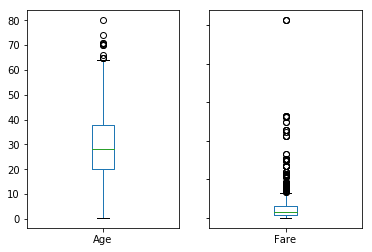

In [144]:
fig, ax = plt.subplots(1, 2, sharey=False)
for i, column in enumerate(['Age', 'Fare']):
    df[column].plot(kind='box', ax=ax[i], sharey=ax[0])

You see that Y-limit of `Fare` is 80 [years] now, while you remember that its true Y-limit is 500 [dollars].

Or vise versa:

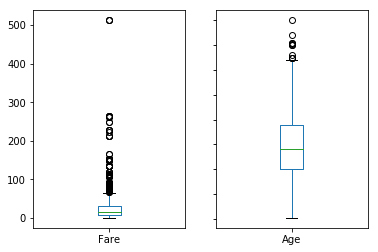

In [145]:
fig, ax = plt.subplots(1, 2)
for i, column in enumerate(['Age', 'Fare'][::-1]):
    df[column].plot(kind='box', ax=ax[i], sharey=True)

### Right way of sharing axes but still wrong due different units.
Axes are normalized by maximum of the both, but units are not the same

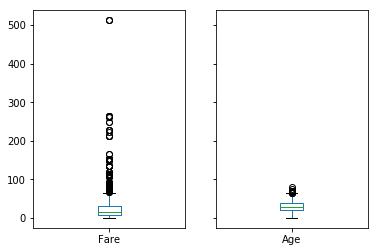

In [146]:
fig, ax = plt.subplots(1, 2, sharey=True)
for i, column in enumerate(['Age', 'Fare'][::-1]):
    df[column].plot(kind='box', ax=ax[i])

## Invert axis

Your axis will grow top down instead of down up.

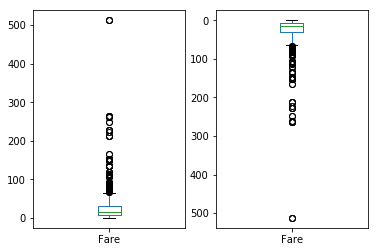

In [147]:
fig, ax = plt.subplots(1, 2)
ax[1].invert_yaxis()
df['Fare'].plot(kind='box', ax=ax[0])
df['Fare'].plot(kind='box', ax=ax[1])

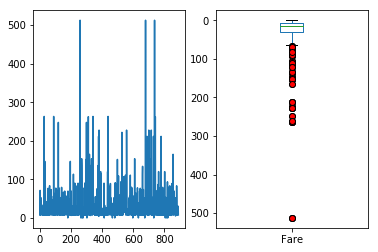

In [148]:
fig, ax = plt.subplots(1, 2)
ax[1].invert_yaxis()
df['Fare'].plot(kind='line', ax=ax[0])
df['Fare'].plot(kind='box', ax=ax[1], flierprops=dict(marker='o', markerfacecolor='r'))

---

## Lets change the plot style

Before you did retrospective stylizing, when you already have a figure with plot and some graphs on it. But you can set style in the beginning. To do it forever
```python
plt.style.use('fivethirtyeight')
...
```
To do it temporary
```python
with plt.style.context(('fivethirtyeight')):
    ...
```

In [149]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


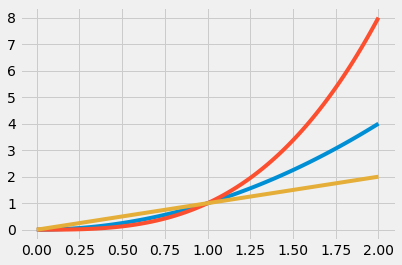

In [150]:
with plt.style.context(('fivethirtyeight')):
    x = np.linspace(0, 2, 100)
    plt.plot(x, x**2, label='quadratic')
    plt.plot(x, x**3, label='cubic')

    plt.plot(x, x, label='linear')

---
# **Appendix**

---
# "Fine stats"

[Pandas_profiling](https://github.com/pandas-profiling/pandas-profiling) generates profile reports from a pandas `DataFrame` like pandas `df.describe()` but a little bit more.

In [ ]:
# !pip install pandas_profiling

In [304]:
import pandas_profiling
import pandas as df

df=pd.DataFrame(
    np.random.rand(100, 2),
    columns=['a', 'b']
)
pandas_profiling.ProfileReport(df)

---
# Matplotlib defaults

[matplotlib.pyplot][ref_plt] is a state-machine that controls plotting on the figure — the main space of drawing graph.

[Interface-methods](https://github.com/oreillymedia/simple-line-plots-with-matplotlib#sidebar-gotchas)

[ref_plt]: https://matplotlib.org/api/pyplot_api.html#module-matplotlib.pyplot

In [2]:
from pylab import rcParams # Run-Control (default) parameters
import matplotlib.pyplot as plt

What kind of defaults can we control?

In [3]:
pprint({param.split('.')[0] for param in rcParams})

{'_internal',
 'agg',
 'animation',
 'axes',
 'axes3d',
 'backend',
 'backend_fallback',
 'boxplot',
 'contour',
 'datapath',
 'date',
 'docstring',
 'errorbar',
 'examples',
 'figure',
 'font',
 'grid',
 'hatch',
 'hist',
 'image',
 'interactive',
 'keymap',
 'legend',
 'lines',
 'markers',
 'mathtext',
 'patch',
 'path',
 'pdf',
 'pgf',
 'polaraxes',
 'ps',
 'savefig',
 'scatter',
 'svg',
 'text',
 'timezone',
 'tk',
 'toolbar',
 'verbose',
 'webagg',
 'xtick',
 'ytick'}



What are not truly defaults?

In [4]:
rcParams_genuine = rcParams.copy()
plt.style.use('default')
rcParams_diff = {param: (rcParams_genuine[param], rcParams[param]) for param in filter(lambda p: rcParams_genuine[p] != rcParams[p], rcParams)}

pprint(rcParams_diff)

{'figure.dpi': (72.0, 100.0),
 'figure.edgecolor': ((1, 1, 1, 0), 'w'),
 'figure.facecolor': ((1, 1, 1, 0), 'w'),
 'figure.figsize': ([6.0, 4.0], [6.4, 4.8]),
 'figure.subplot.bottom': (0.125, 0.11)}



What is range of options?

In [5]:
for rcClass in ['figure']: # ['axes', 'figure', 'font', 'grid', 'hist', 'legend', 'lines', 'savefig', 'text', 'xtick', 'ytick']:
    subParams = {param: rcParams[param] for param in filter(lambda param: param.split('.')[0] == rcClass, rcParams)}
    pprint(subParams)

{'figure.autolayout': False,
 'figure.constrained_layout.h_pad': 0.04167,
 'figure.constrained_layout.hspace': 0.02,
 'figure.constrained_layout.use': False,
 'figure.constrained_layout.w_pad': 0.04167,
 'figure.constrained_layout.wspace': 0.02,
 'figure.dpi': 100.0,
 'figure.edgecolor': 'w',
 'figure.facecolor': 'w',
 'figure.figsize': [6.4, 4.8],
 'figure.frameon': True,
 'figure.max_open_warning': 20,
 'figure.subplot.bottom': 0.11,
 'figure.subplot.hspace': 0.2,
 'figure.subplot.left': 0.125,
 'figure.subplot.right': 0.9,
 'figure.subplot.top': 0.88,
 'figure.subplot.wspace': 0.2,
 'figure.titlesize': 'large',
 'figure.titleweight': 'normal'}



For example you can set default size of *figure*

In [3]:
rcParams['figure.figsize'] = 8, 5

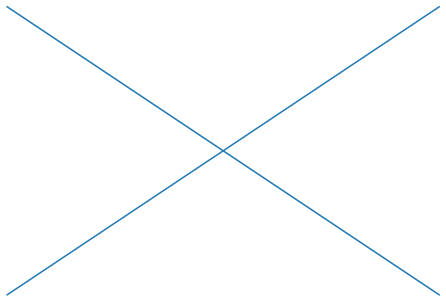

In [54]:
import matplotlib as mpl
fig = plt.figure()

l1 = mpl.lines.Line2D([0, 1], [0, 1],
           transform=fig.transFigure, figure=fig)

l2 = mpl.lines.Line2D([0, 1], [1, 0],
           transform=fig.transFigure, figure=fig)

fig.lines.extend([l1, l2])

## What can you plot else with Maplotlib?

In [25]:
[p for p in filter(lambda prop: 'plot' in prop, dir(ax[0]))]

['_subplotspec',
 'boxplot',
 'eventplot',
 'get_subplotspec',
 'plot',
 'plot_date',
 'set_subplotspec',
 'stackplot',
 'streamplot',
 'triplot',
 'violinplot']

# Axes as subplot

Degenerated case of subplots is a single plot (*subplot*) spanning whole *figure*. This is default behaviour of `plt.subplots()`.

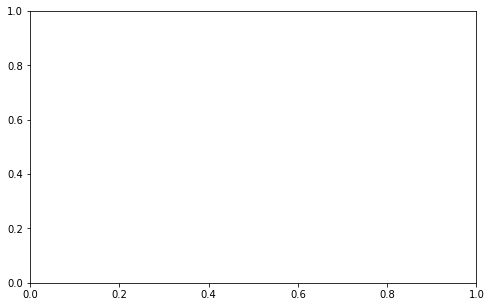

In [15]:
fig, ax = plt.subplots()

In [17]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

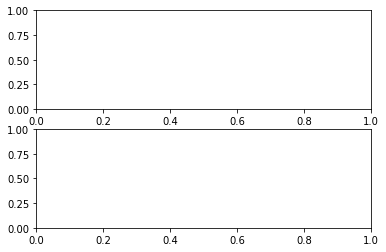

In [410]:
# https://matplotlib.org/tutorials/intermediate/constrainedlayout_guide.html#use-with-gridspec

from matplotlib import gridspec

fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1, figure=fig)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

# Figure layout
[](https://matplotlib.org/tutorials/intermediate/constrainedlayout_guide.html#figure-layout)

Figures are laid out in a hierarchy:

* Figure: `fig = plt.figure()`
  * Gridspec: `gs0 = gridspec.GridSpec(1, 2, figure=fig)`
    * Subplotspec: `ss = gs[0, 0]`
      * Axes: `ax0 = fig.add_subplot(ss)`
    * Subplotspec: `ss = gs[0, 1]`
      * Gridspec: `gsR = gridspec.GridSpecFromSubplotSpec(2, 1, ss)`
          * Subplotspec: `ss = gsR[0, 0]`
            * Axes: `axR0 = fig.add_subplot(ss)`
          * Subplotspec: `ss = gsR[1, 0]`
            * Axes: `axR1 = fig.add_subplot(ss)`
            
For a single Axes the layout is straight forward. The Figure and outer Gridspec layoutboxes coincide. The Subplotspec and Axes boxes also coincide because the Axes has no colorbar. [](https://matplotlib.org/tutorials/intermediate/constrainedlayout_guide.html#simple-case-one-axes)

---

# Homework

In [102]:
!wget https://github.com/oreillymedia/doing_data_science/raw/master/dds_datasets.zip
!unzip -qu dds_datasets.zip
!unzip -qu -d dds_datasets/dds_ch2_rollingsales dds_datasets/dds_ch2_rollingsales.zip -x __MACOSX/*
!unzip -qu -d dds_datasets/dds_ch2_nyt dds_datasets/dds_ch2_nyt.zip -x __MACOSX/*
!ls dds_datasets/*

--2019-01-12 15:56:18--  https://github.com/oreillymedia/doing_data_science/raw/master/dds_datasets.zip
Resolving github.com (github.com)... 140.82.118.3, 140.82.118.4
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oreillymedia/doing_data_science/master/dds_datasets.zip [following]
--2019-01-12 15:56:18--  https://raw.githubusercontent.com/oreillymedia/doing_data_science/master/dds_datasets.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.244.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.244.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37077779 (35M) [application/zip]
Saving to: ‘dds_datasets.zip’

dds_datasets.zip    100%[===================>]  35.36M  12.4MB/s    in 2.9s    

2019-01-12 15:56:22 (12.4 MB/s) - ‘dds_datasets.zip’ saved [37077779/37077779]

dds_datasets/dds_ch

In [72]:
[f for f in filter(lambda a: 'read' in a, dir(pd))]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

In [127]:
df = pd.read_excel('dds_datasets/dds_ch2_rollingsales/rollingsales_bronx.xls', skiprows=4)
df.head()

BOROUGH               NEIGHBORHOOD  \
0        2  BATHGATE                    
1        2  BATHGATE                    
2        2  BATHGATE                    
3        2  BATHGATE                    
4        2  BATHGATE                    

                        BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  01  ONE FAMILY HOMES                                            1   3028   
1  01  ONE FAMILY HOMES                                            1   3039   
2  01  ONE FAMILY HOMES                                            1   3046   
3  01  ONE FAMILY HOMES                                            1   3046   
4  02  TWO FAMILY HOMES                                            1   2900   

   LOT EASE-MENT BUILDING CLASS AT PRESENT  \
0   25                                  A5   
1   28                                  A1   
2   39                                  A1   
3   52                                  A1   
4   61                                  S2   

                                     ADDRESS APART\nMENT\nNUMBER    ...      \
0  412 EAST 179TH STREET                                            ...       
1  2329 WASHINGTON AVENUE                                           ...       
2  2075 BATHGATE AVENUE                                             ...       
3  2047 BATHGATE AVENUE                                             ...       
4  406 EAST TREMONT AVENUE                                          ...       

   RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                  1                 0            1              1842   
1                  1                 0            1              1103   
2                  1                 0            1              1986   
3                  1                 0            1              2329   
4                  2                 1            3              1855   

   GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0               2048        1901                          1   
1               1290        1910                          1   
2               1344        1899                          1   
3               1431        1901                          1   
4               4452        1931                          1   

  BUILDING CLASS AT TIME OF SALE SALE\nPRICE  SALE DATE  
0                             A5      355000 2013-07-08  
1                             A1      474819 2013-05-20  
2                             A1      210000 2013-03-12  
3                             A1      343116 2013-07-01  
4                             S2           0 2012-08-31  

[5 rows x 21 columns]

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 21 columns):
BOROUGH                           5268 non-null int64
NEIGHBORHOOD                      5268 non-null object
BUILDING CLASS CATEGORY           5268 non-null object
TAX CLASS AT PRESENT              5268 non-null object
BLOCK                             5268 non-null int64
LOT                               5268 non-null int64
EASE-MENT                         5268 non-null object
BUILDING CLASS AT PRESENT         5268 non-null object
ADDRESS                           5268 non-null object
APART
MENT
NUMBER                 5268 non-null object
ZIP CODE                          5268 non-null int64
RESIDENTIAL UNITS                 5268 non-null int64
COMMERCIAL UNITS                  5268 non-null int64
TOTAL UNITS                       5268 non-null int64
LAND SQUARE FEET                  5268 non-null int64
GROSS SQUARE FEET                 5268 non-null int64
YEAR BUILT            

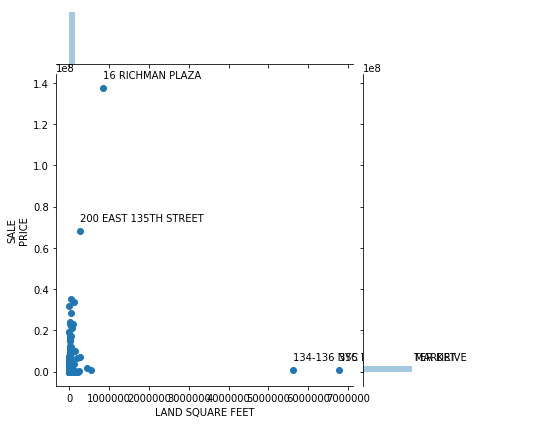

In [178]:
j = sns.jointplot(x='LAND SQUARE FEET', y='SALE\nPRICE', data=df)
# j.ax_joint.set_xlim(-1000, 20000)
# j.ax_joint.set_ylim(-1000, 10000000)

head = df.sort_values(by=['SALE\nPRICE'], ascending=[False]).head(2)

tail = df.sort_values(by=['LAND SQUARE FEET'], ascending=[False]).head(2)

def ann(row):
    ind = row[0]
    r = row[1]
#     print(row)
    j.ax_joint.annotate(r["ADDRESS"], xy=(r["LAND SQUARE FEET"], r["SALE\nPRICE"]), 
            xytext=(0,10), textcoords="offset points", )

for row in head.iterrows():
    ann(row)
for row in tail.iterrows():
    ann(row)

In [70]:
# !pip install adjustText

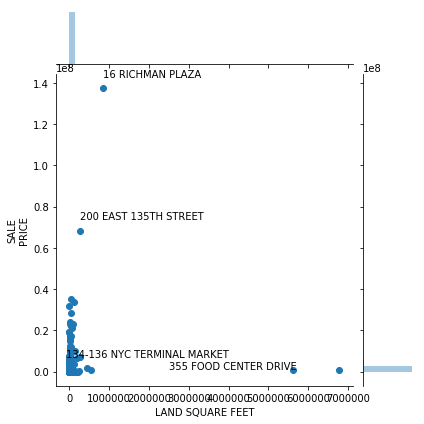

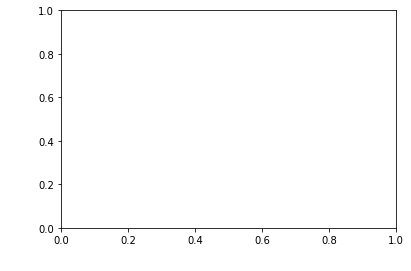

In [179]:
import matplotlib
from adjustText import adjust_text
annotations = [child for child in j.ax_joint.get_children() if isinstance(child, matplotlib.text.Annotation)]
adjust_text(annotations, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))
j.fig

---

## Scatter plot with 2d density

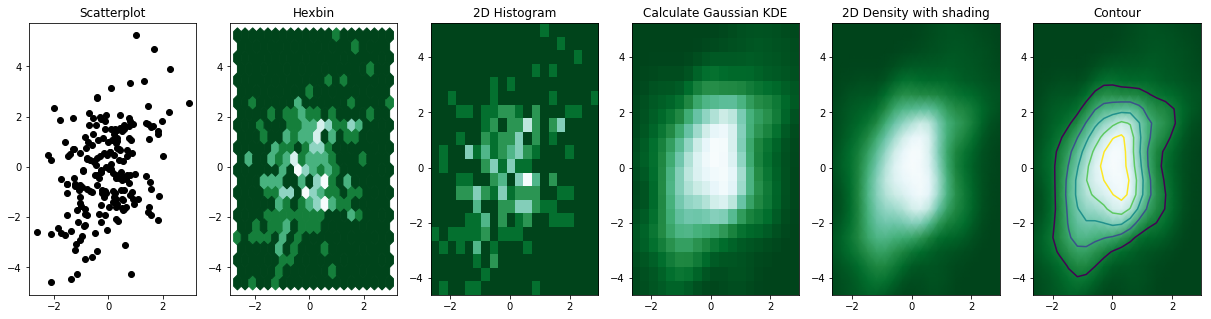

In [180]:
# https://python-graph-gallery.com/86-avoid-overlapping-in-scatterplot-with-2d-density/
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
 
# Create data: 200 points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overplottin here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )


# Parallel coordinates

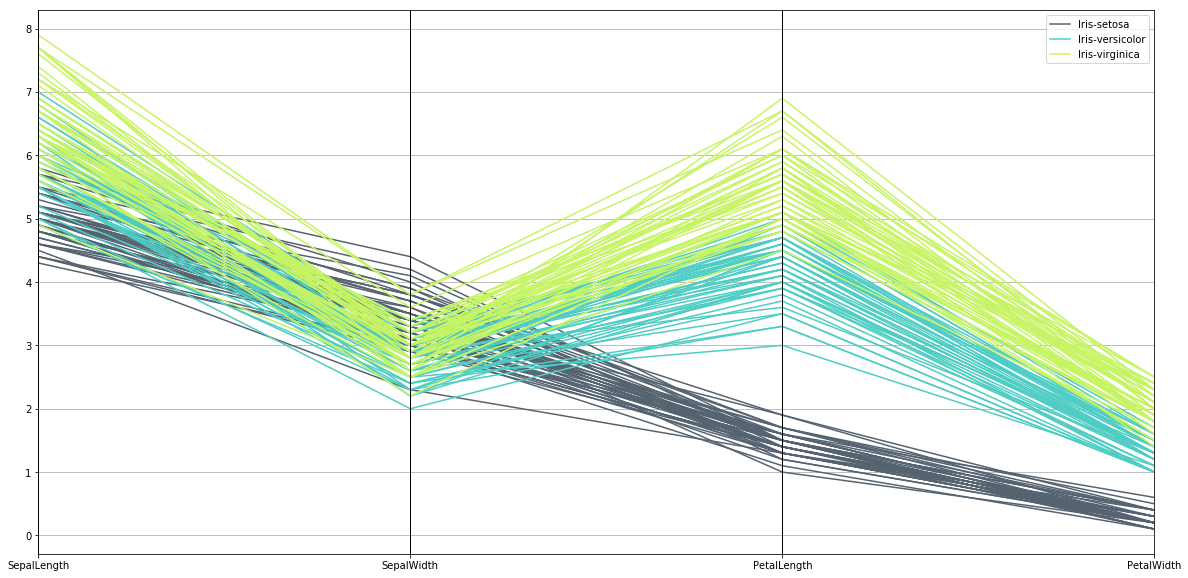

In [517]:
from pandas.plotting import parallel_coordinates

fig, ax = plt.subplots(figsize=(20, 10))
df = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv')
parallel_coordinates(df, 'Name', color=('#556270', '#4ECDC4', '#C7F464'), ax=ax)

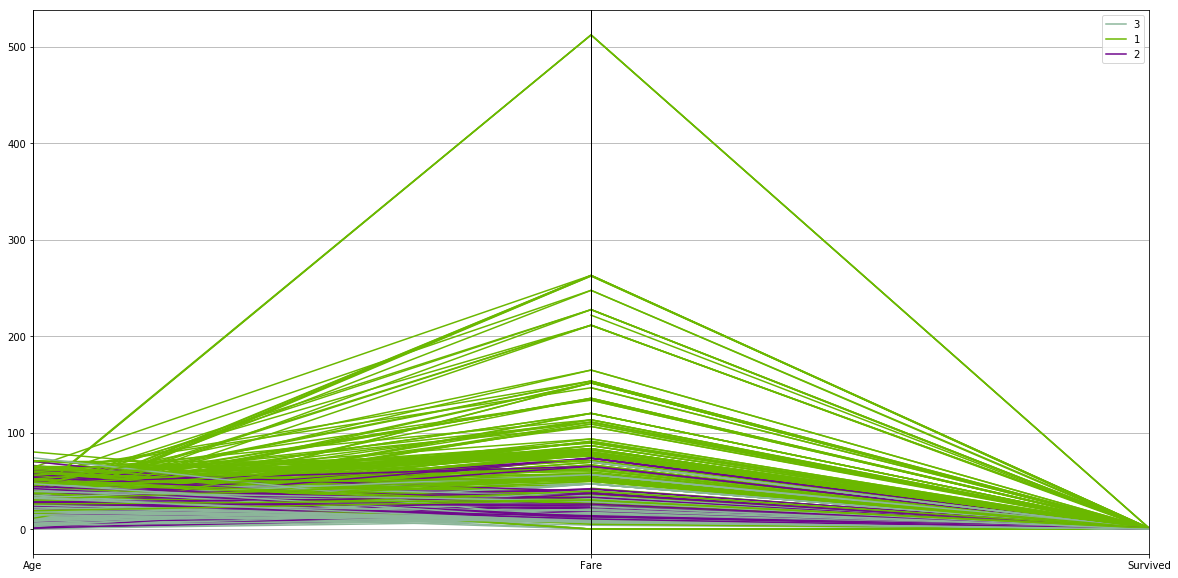

In [518]:
from pandas.plotting import parallel_coordinates

fig, ax = plt.subplots(figsize=(20, 10))
df = pd.read_csv('data/train.csv')
parallel_coordinates(df[['Pclass', 'Age', 'Fare', 'Survived']], 'Pclass', ax=ax)

> However we can see clearly that there is some scaling problems with this graph. It is difficult to glean any insight due to the scale of the weight attribute overwhelming the other attributes.
>
> We could just normalise each of the columns, but then we lose information on the values and range.
>
> Instead we will use matplotlib to define each attribute on a single axis that has its own scale.

[](http://benalexkeen.com/parallel-coordinates-in-matplotlib/)
[](https://plot.ly/python/parallel-coordinates-plot/)

{'Pclass': [1, 3, 2], 'Fare': [0.0, 512.3292, 512.3292], 'Age': [0.42, 80.0, 79.58], 'Survived': [0, 1, 1]}


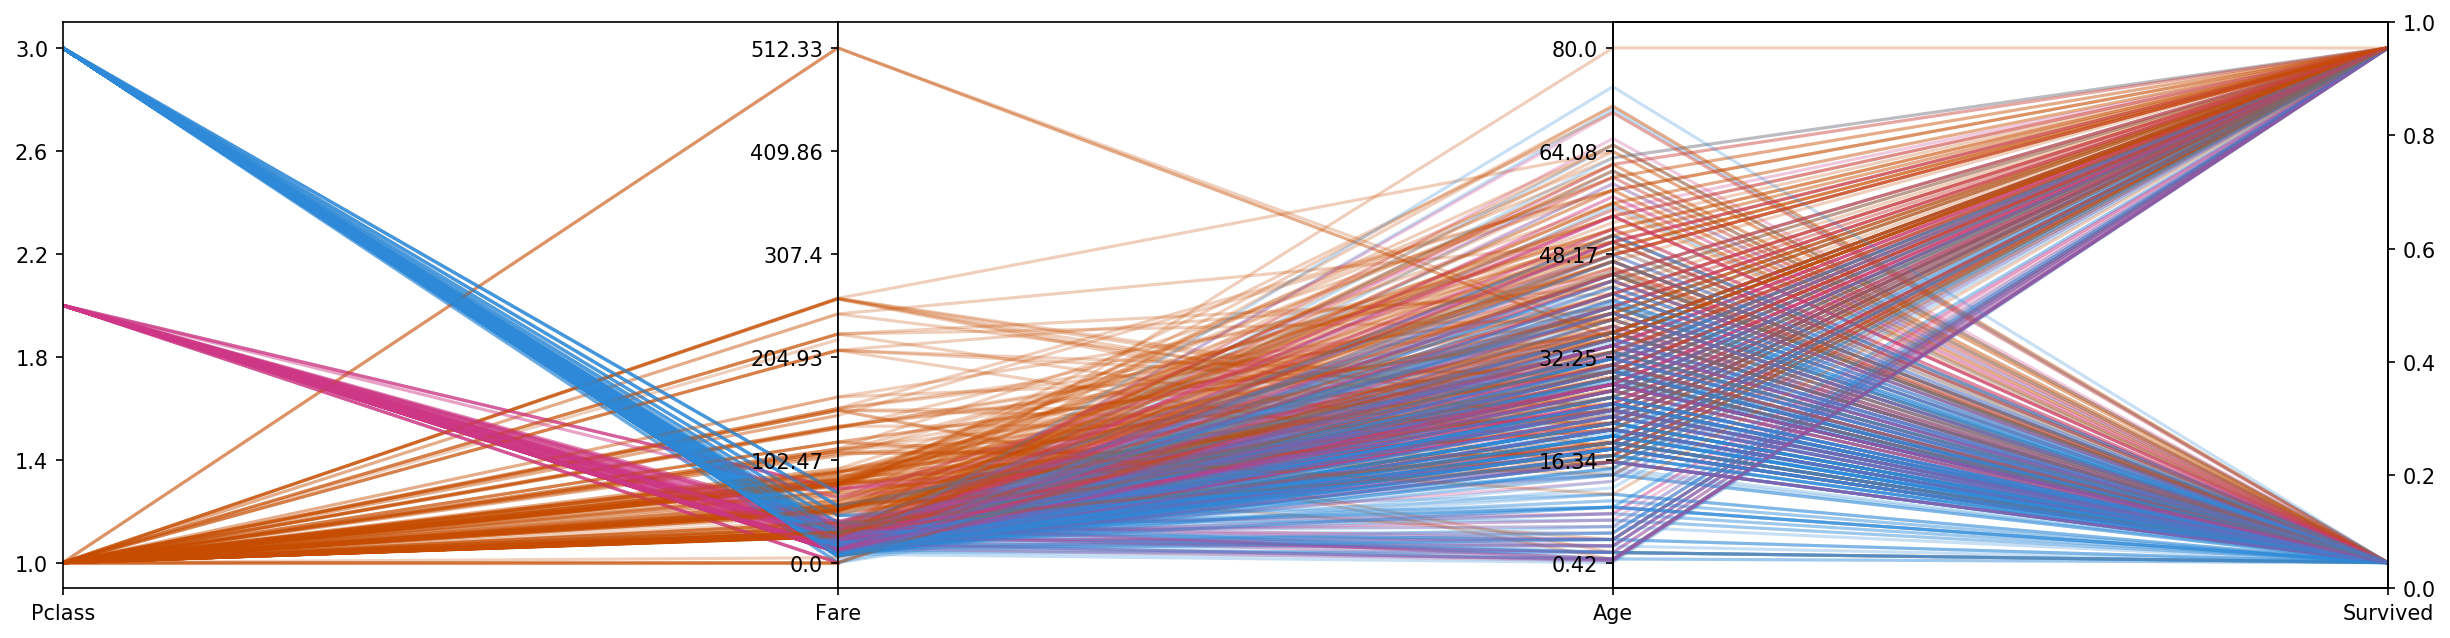

In [486]:
from matplotlib import ticker

df = pd.read_csv('data/train.csv')

cols = ['Pclass', 'Fare', 'Age', 'Survived']
x = [i for i, _ in enumerate(cols)]
colours = ['#cd378544', '#2e8ad844', '#c64c0044', '#889a0044']

# create dict of categories: colours
# factors = [1, 2, 3]
factors = df['Pclass'].factorize()[1]
factors0 = df['Pclass'].factorize()[0]
colours = {factor: colours[i] for i, factor in enumerate(factors)}
# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(20,5), dpi=150)

# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))
print(min_max_range)
# Plot each row
for i, ax in enumerate(axes):
    for idx in df.index:
        mpg_category = factors0[idx] + 1
        ax.plot(x, df.loc[idx, cols],
                colours[mpg_category])
    ax.set_xlim([x[i], x[i+1]])
    
# Set the tick positions and labels on y axis for each plot
# Tick positions based on normalised data
# Tick labels are based on original data
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    norm_min = df[cols[dim]].min()
    norm_range = np.ptp(df[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)

for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[dim]])
    

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=6)
ax.set_xticklabels([cols[-2], cols[-1]])


# Remove space between subplots
plt.subplots_adjust(wspace=0)

# Add legend to plot
# plt.legend(
#     [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in factors],
#     factors,
#     bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)